# AssurPrime : Saurez-vous prédire la prime d'assurance ?

<p align="center">
  <img src="https://challengedata.ens.fr/logo/public/CA_assurances_RVB_sans-raison-d%C3%AAtre_%C3%A9v%C3%A9nementiel_Mg5WVL6.png" width="350" title="Crédit Agricole Assurances">
  <p align="center">
    <a href="https://colab.research.google.com/github/auduvignac/challengedata_ens_AssurPrime/blob/main/notebooks/exploration/assurprim_modeling_workflow.ipynb" target="_blank">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Ouvrir dans Google Colab"/>
    </a>
  </p>
</p>

# Présentation complète du projet

## Contexte

Crédit Agricole Assurances est une filiale du Groupe Crédit Agricole dédiée à l’assurance, faisant de celui-ci un acteur multi-expert de la bancassurance et le 1er bancassureur en Europe.
Crédit Agricole Assurances regroupe plusieurs entités, dont Predica et Pacifica, qui proposent une large gamme d’assurances aux particuliers, aux exploitants agricoles, aux professionnels et aux entreprises. Crédit Agricole Assurances s’engage à offrir des solutions innovantes et adaptées aux besoins des clients, tout en favorisant le développement durable et la responsabilité sociale.
Au sein de l’Académie Data Science du groupe, l’objectif est de participer activement à la montée en compétences des collaborateurs, de partager des connaissances et d’identifier de nouveaux usages.

## Objectif

Le contrat Multirisque Agricole, géré par Pacifica, est souscrit par les agriculteurs pour sécuriser leur exploitation. Il couvre l’activité professionnelle, les dommages aux bâtiments d’exploitation, le matériel stocké, ainsi que la protection financière et juridique. Ce contrat garantit à l’assuré une couverture efficace et durable, assurant ainsi la continuité de son activité en cas de sinistre, tant sur le plan matériel que financier.

Actuellement, le risque d’incendie constitue une part majeure de la charge sinistre du contrat Multirisque Agricole, ce qui en fait un enjeu clef à modéliser avec précision.

L’objectif est d’identifier le meilleur modèle pour prédire la prime pure incendie, en utilisant :
- Un modèle pour la Fréquence,
- Un modèle pour le Coût moyen.

La variable cible finale, la charge, est obtenue en multipliant la fréquence, le coût moyen, et le nombre d’années depuis la souscription du contrat (la variable `ANNEE_ASSURANCE`).


## Description des données

Un fichier supplémentaire est mis à disposition regroupant toutes les variables disponibles, accompagnées de leur description. Ce fichier inclut :

- **Les variables cibles** : `FREQ`, `CM`, et `CHARGE`
- **Données géographiques** : département, données météorologiques, etc.
- **Données spécifiques au contrat**, notamment :
    - L’activité de l’assuré (cultivateur, polyculteur, etc.)
    - Les indicateurs de souscription des garanties
    - Le nombre de bâtiments, de salariés, et de sinistres déclarés lors de la souscription
    - **Données de surface** : surfaces des bâtiments (élevage, exploitation, etc.), anonymisées en `surface1`, `surface2`, etc., pour garantir la confidentialité
    - **Données de capitaux** : capitaux assurés pour différentes options (vol, serres, etc.), anonymisés en `capital1`, `capital2`, etc.
    - **Données liées à la prévention** : présence d’équipements (extincteurs, structure en bois, etc.), anonymisées en `prev1`, `prev2`, etc.


## Description du *benchmark*

### Objectif du *challenge*

L’objectif de ce challenge est de comparer les performances des modèles développés dans le cadre de cette compétition avec celles d’un modèle de référence basé sur des **GLM (Generalized Linear Models)** classiques.

### Structure du benchmark

Le benchmark repose sur deux modèles **GLM** distincts :

- Fréquence des sinistres :
    - Distribution : *Loi de Poisson* ;
    - Fonction de lien : *Log*.

- Coût moyen d’un sinistre :
    - Distribution : *Tweedie* ;
    - Fonction de lien : *Log*.

### Évaluation

L’évaluation des modèles repose sur une métrique unique : **RMSE (Root Mean Square Error)**, définie par la formule suivante :

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

où :
- $y_i$ représente la valeur réelle ;
- $\hat{y}_i$ représente la valeur prédite ;
- $n$ est le nombre d’observations.

L’idée reste d’évaluer dans quelle mesure les approches proposées permettent de dépasser les performances des modèles standards tout en prenant en compte :

- La précision des prédictions ;
- Les aspects d’interprétabilité et d’efficacité ;
- Les contraintes métier associées.

# Résumé

Le but est de construire un pipeline de modélisation permettant d’estimer la **charge sinistre incendie**, via deux composantes principales :

- La **fréquence des sinistres** : `FREQ` ;
- Le **coût moyen des sinistres** : `CM`.

La variable cible finale est définie comme : `CHARGE` = `FREQ` $\times$ `CM` $\times$ `ANNEE_ASSURANCE`.

## Données disponibles

- **Cibles** :
  - `FREQ`;
  - `CM`;
  - `CHARGE`.
- **Informations géographiques** :
  - département;
  - météo.
- **Descripteurs du contrat** :
  - activité assurée ;
  - garanties souscrites ;
  - nombre de bâtiments ;
  - surface ;
  - capitaux ;
  - équipements de prévention.
- **Variables anonymisées** : certaines variables sensibles ont été anonymisées pour des raisons de confidentialité. Bien que leur signification exacte soit masquée, leur typologie (quantitative, binaire, etc.) permet d’en exploiter le contenu via des méthodes d’analyse statistique et de modélisation. Elles se présentent sous forme de groupes de variables thématiques telles que :
  - `surface1`, `surface2`, ... : indicateurs de **surfaces agricoles** (bâtiments d’élevage, stockage, exploitation, etc.)
  - `capital1`, `capital2`, ... : **capitaux assurés** pour différentes garanties optionnelles (ex. vol, serres, machines)
  - `prev1`, `prev2`, ... : **mesures de prévention** contre les incendies ou sinistres (présence d’extincteurs, structures en matériaux spécifiques, etc.)


## Modèle de référence (benchmark)

Un double modèle **GLM** sert de base comparative :

| Modèle        | Distribution | Fonction de lien |
|---------------|--------------|------------------|
| Fréquence     | Poisson      | Log              |
| Coût moyen    | Tweedie      | Log              |

Ces modèles sont évalués selon la **Root Mean Square Error (RMSE)** :$\sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}$, sur la variable finale `CHARGE`.

## Contenu du notebook

Ce notebook comprend les étapes suivantes :

1. **Exploration des données** ;
2. **Préparation des variables** (*feature engineering*, nettoyage, encodage) ;
3. **Modélisation fréquence et coût moyen** ;
4. **Évaluation des performances** ;
5. **Analyse des résidus et interprétation**.

# Bibliothèques utilisées

Cette section regroupe l’installation et l’importation des bibliothèques nécessaires pour l’ensemble du pipeline : de l’analyse exploratoire à la modélisation, en passant par le prétraitement des données et l’évaluation des performances.

### Manipulation de données
- `pandas`, `numpy` : gestion et transformation de données tabulaires et numériques.

### Visualisation
- `matplotlib.pyplot`, `seaborn` : création de graphiques pour l’exploration visuelle des données et l’interprétation des résultats.

### Machine Learning
- `scikit-learn` :
  - Prétraitement : `SimpleImputer`, `StandardScaler`
  - Modélisation : régression logistique, Ridge, Random Forest, Gradient Boosting
  - Validation croisée, tuning et métriques : RMSE, F1-score, AUC, etc.
- `xgboost` : algorithmes de boosting performants via `XGBClassifier` et `XGBRegressor`.

### Affichage dans le notebook
- `IPython.display.display` : affichage ciblé et lisible des DataFrames ou objets complexes.


In [ ]:
!pip install -q ipython \
                matplotlib \
                numpy \
                pandas \
                pydantic-settings \
                scikit-learn \
                seaborn \
                xgboost \
                ydata-profiling

In [ ]:
import re
import warnings
from collections import defaultdict

# Standard library (ex. pathlib, math, os, sys)
from pathlib import Path

# Third-party libraries (ex. numpy, pandas, matplotlib, scikit-learn)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import (
    HTML,
    display,
)
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.impute import (
    SimpleImputer,
)

# from sklearn.linear_model import (
#     LogisticRegression,
#     Ridge,
# )
# from sklearn.metrics import (
#     mean_squared_error,
#     roc_auc_score,
# )
from sklearn.model_selection import (
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from xgboost import (
    XGBRegressor,
)

# Chargement et aperçu des données

Chargement des fichiers de données d'entraînement à partir des sources distantes. Les fichiers comprennent :

- `X_train` : variables explicatives issues des contrats d’assurance ;
- `y_train` : variables cibles associées :
  - `FREQ` : fréquence des sinistres incendie ;
  - `CM` : coût moyen par sinistre ;
  - `CHARGE` : charge totale sinistre incendie (`CHARGE` = `FREQ` $\times$ `CM` $\times$ `ANNEE_ASSURANCE`).

Le chargement des fichiers repose sur une stratégie de *fallback* : les données sont d’abord recherchées en local (chemins absolus), et en cas d’absence, elles sont automatiquement téléchargées depuis des URLs distantes, puis conservées localement pour les exécutions futures.

In [3]:
# Définition des chemins locaux
local_x_path = Path("../../data/raw/x_train.csv").resolve()
local_y_path = Path("../../data/raw/y_train.csv").resolve()

# URLs distantes (GitHub)
X_train_url = (
    "https://media.githubusercontent.com/media/auduvignac/"
    "challengedata_ens_AssurPrime/refs/heads/main/data/raw/x_train.csv"
)
y_train_url = (
    "https://media.githubusercontent.com/media/auduvignac/"
    "challengedata_ens_AssurPrime/refs/heads/main/data/raw/y_train.csv"
)


def load_dataset(local_path, url, name):
    """
    Charge un fichier CSV depuis un chemin local, ou le télécharge depuis
    une URL si le fichier n'existe pas localement.

    Le fichier est ensuite sauvegardé localement pour les exécutions
    futures (fallback).

    Parameters
    ----------
    local_path : pathlib.Path
        Chemin vers le fichier local.
    url : str
        URL distante du fichier CSV.
    name : str
        Nom affiché lors du chargement (utilisé pour les logs).

    Returns
    -------
    pandas.DataFrame
        Le contenu du fichier CSV sous forme de DataFrame.
    """
    if local_path.exists():
        print(f"{name} chargé depuis : {local_path}")
        return pd.read_csv(local_path)
    else:
        print(f"{name} non trouvé localement, téléchargement depuis l'URL...")
        df = pd.read_csv(url)
        local_path.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(local_path, index=False)
        print(
            f"{name} téléchargé et enregistré localement dans : {local_path}"
        )
        return df


# Chargement des jeux de données
try:
    print("Chargement des données...")
    X_train = load_dataset(local_x_path, X_train_url, "X_train")
    y_train = load_dataset(local_y_path, y_train_url, "y_train")
    print("Données chargées avec succès.\n")

except Exception as e:
    print("Échec du chargement des données.")
    print("Vérifiez la validité des URL ou la connexion internet.")
    print(e)

Chargement des données...
X_train chargé depuis : /data/raw/x_train.csv


/tmp/ipython-input-3-2097101940.py:40: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(local_path)


y_train chargé depuis : /data/raw/y_train.csv
Données chargées avec succès.



Le message d’avertissement suivant : `DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types`
indique que plusieurs colonnes présentent des types de données hétérogènes, combinant notamment des chaînes de caractères et des valeurs numériques.
Ce mélange complique l’inférence automatique des types par `pandas`, ce qui peut entraîner des incohérences lors de l'importation, ainsi qu’un impact non négligeable sur les performances, en particulier sur des jeux de données de grande taille, comme c'est le cas ici.
Dans la suite de ce document, une spécification explicite des types attendus (`dtype`) ainsi que des étapes de nettoyage préalable des colonnes seront mises en œuvre, afin de garantir la fiabilité et la cohérence des traitements ultérieurs.

Une fois le chargement des données effectué, il convient tout d’abord de vérifier que `X_train` et `y_train` possèdent le même nombre de lignes. Un aperçu des premières lignes du jeu d’entraînement est ensuite présenté afin d’en examiner la structure et le contenu.

In [4]:
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de y_train : {y_train.shape}")

if len(X_train) == len(y_train):
    print("Les jeux de données disposent bien du même nombre d'observations.")
else:
    print(
        "Les jeux de données ne disposent pas du même nombre d'observations."
    )

Dimensions de X_train : (383610, 374)
Dimensions de y_train : (383610, 5)
Les jeux de données disposent bien du même nombre d'observations.


La correspondance en nombre d’observations entre `X_train` et `y_train` étant assurée, nous poursuivons avec une inspection des premières colonnes de `X_train`, afin d’identifier la nature et l’hétérogénéité des variables disponibles.

## Aperçu des variables explicatives (`X_train`)

Le jeu de données `X_train` contient les **variables explicatives** issues des contrats d’assurance souscrits dans le cadre du produit Multirisque Agricole.  
Chaque ligne correspond à **un contrat**, et chaque colonne décrit une caractéristique associée.

Ci-dessous, les premières lignes de `X_train` sont affichées pour donner un aperçu de la structure des données. disponibles.

In [5]:
# aperçu de X_train
display(X_train.head())

,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,...,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,ANNEE_ASSURANCE,ESPINSEE,AN_EXERC,ZONE
0,1,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
1,2,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
2,3,ACT1,VOC6,1,2,N,R,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.402740,NaN,ANNEE5,3
3,4,ACT1,VOC6,2,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.246575,NaN,ANNEE5,3
4,5,ACT1,VOC6,2,1,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,03. <= 102,03. <= 232,04. >= 25,02. <= 57,0.838356,NaN,ANNEE5,3


Les premières colonnes mettent en évidence la richesse du jeu de données :

- **Variables catégorielles** liées au contrat : `ACTIVIT2`, `VOCATION`, `TYPERS`, etc.
- **Caractéristiques techniques ou déclaratives** : `CARACT1`, `CARACT2`, etc.
- **Données météorologiques et historiques** : variables commençant par `NBJRR`, `RR_VOR`, `RRAB_VOR`, etc.
- **Variables numériques continues** comme `ANNEE_ASSURANCE`, indiquant l’ancienneté du contrat.

Certaines colonnes contiennent :

- Des **valeurs manquantes** qu’il faudra prendre en compte dans le cadre du prétraitement ;
- Des données **anonymisées ou encodées** (`surface1`, `capital1`, `prev1`, etc.) pour des raisons de confidentialité.

### Statistiques descriptives de `X_train`

Examinons les statistiques descriptives de `X_train` pour mieux comprendre la distribution des variables, identifier les valeurs manquantes et détecter les éventuelles anomalies.

Préalablement, une fonction `display_scrollable_df` est définie pour afficher un *DataFrame* de manière défilante, facilitant ainsi la visualisation des résultats sur l’ensemble des variables.

In [6]:
def display_scrollable_df(
    df, height=300, border_color="lightgray", padding=10, index=False
):
    """
    Affiche un DataFrame dans une boîte HTML scrollable.

    Paramètres :
    - df : DataFrame à afficher
    - height : hauteur (en pixels) de la boîte (par défaut 300)
    - border_color : couleur de la bordure (par défaut lightgray)
    - padding : espacement intérieur (en pixels, par défaut 10)
    """
    html = df.to_html(index=index)
    return HTML(
        f"""
        <div style="height:{height}px; overflow:auto;
                    border:1px solid {border_color}; padding:{padding}px">
            {html}
        </div>
        """
    )

Le tableau ci-dessous fournit un résumé statistique des **94 variables numériques** de `X_train`, calculé sur les colonnes de types `int64` et `float64`.

Ce résumé permet notamment de :
- Identifier les **ordres de grandeur** et la **variabilité** des variables ;
- Détecter la présence de **valeurs manquantes** (via les valeurs de `count`) ;
- Repérer les **variables constantes** ou à faible dispersion. Pour cela, l’écart-type (*standard deviation*), permettant de mesurer à quel point les valeurs d’une variable sont dispersées autour de la moyenne, sera particulièrement utile. Plus l'écart-type est élevé, plus la variabilité est élevée (i.e. les valeurs sont dispersées), ce qui peut laisser supposer que la variable apporte une information discriminante pour la modélisation. À l’inverse, un écart-type proche de 0 indique une faible variabilité, ce qui peut suggérer que la variable n’apporte pas d’information discriminante pour la modélisation ;
- Observer les distributions à travers les **quartiles** (`25%`, `50%`, `75%`) ;
- Identifier d’éventuelles **valeurs extrêmes** (`min`, `max`) pouvant signaler des outliers.

L’analyse de ce tableau permettra de prioriser les traitements à venir (imputation, transformation, normalisation, etc.).

In [7]:
# Affiche un résumé statistique des variables numériques de X_train :
# - Transposé pour avoir une ligne par variable et les statistiques en colonnes
# - Arrondi à 2 décimales pour une meilleure lisibilité
summary_numeric = X_train.describe().T.round(2)
display_scrollable_df(summary_numeric, index=True)

,count,mean,std,min,25%,50%,75%,max
ID,383610.0,191805.50,110738.81,1.0,95903.25,191805.50,287707.75,383610.0
TYPERS,383610.0,1.67,0.47,1.0,1.00,2.00,2.00,2.0
ANCIENNETE,383610.0,5.18,3.82,0.0,2.00,5.00,9.00,11.0
CARACT2,15326.0,1.02,0.14,1.0,1.00,1.00,1.00,2.0
DUREE_REQANEUF,357037.0,2.20,1.30,0.0,2.00,2.00,2.00,10.0
CARACT5,383610.0,0.08,0.42,0.0,0.00,0.00,0.00,20.0
TYPBAT2,383610.0,1.06,0.83,0.0,0.00,1.00,2.00,2.0
DEROG15,383610.0,100.00,0.29,70.0,100.00,100.00,100.00,100.0
CA1,383610.0,1047.40,4777.35,0.0,0.00,0.00,0.00,30000.0
CA2,383610.0,4.11,329.38,0.0,0.00,0.00,0.00,30000.0


### Premiers constats quant aux statistiques descriptives relatives à `X_train`

- Plusieurs variables comme `CARACT2`, `RISK5` ou `ZONE_VENT` affichent un nombre d’observations inférieur au nombres de lignes associés au *dataset* (`count = 383 610`), indiquant la présence de **valeurs manquantes** (déjà constatée dans l’aperçu des données) ;
- Certaines variables ont des **valeurs maximales très élevées** (`CA1`, `CA2` jusqu’à `30 000`, `CA3` jusqu’à `50 000`), ce qui pourrait **influencer fortement la distribution**, notamment en cas de forte asymétrie ou de valeurs extrêmes isolées (*outliers*) ;
- Des colonnes comme `EQUIPEMENT1` ou `EQUIPEMENT3` semblent **binaires ou quasi-binaires** (`min = 0`, `max = 1`, `mean` faible), ce qui suggère qu'elles peuvent être traitées comme des **indicateurs logiques** ;
- La colonne `ANNEE_ASSURANCE` varie entre environ `0.0027` et `2.0`, ce qui suggère qu’il s’agit d’un **ratio (ou prorata) d’années** plutôt qu’un entier représentant un nombre d’années complètes ;
- Certaines variables telles que `DEROG15`, `TYPBAT2` ou `CARACT5` présentent une **variabilité très faible** (majorité de modalités identiques), ce qui peut **limiter leur pouvoir discriminant** en modélisation et justifie une réflexion sur leur maintien ;
- D'autres variables comme `KAPITAL10`, `KAPITAL11` ou `KAPITAL12` montrent une grande **hétérogénéité en valeur**, parfois avec une majorité de zéros, ce qui pourrait indiquer une **sparsité partielle** qu'il conviendra d’examiner plus précisément ;
- Enfin, certaines familles de variables (`SURFACE`, `NBBAT`, `KAPITAL`, `RISK`) présentent des structures répétées (suffixes numériques), suggérant un **modèle de codage hiérarchique ou multi-dimensionnel**, qu’il pourrait être utile de regrouper ou résumer par des agrégats statistiques lors du prétraitement.

Cette analyse guidera la **phase de nettoyage** et de **sélection de variables**, en complément de la visualisation et du traitement des valeurs manquantes.

Dans une démarche analogue, examinons à présent la structure de `y_train`, qui regroupe les **variables cibles** indispensables à la modélisation.

## Aperçu des variables cibles (`y_train`)

Le jeu de données `y_train` contient les **variables cibles** associées à chaque contrat :

- `FREQ` : fréquence des sinistres liés à l’incendie (éventuellement nulle) ;
- `CM` : coût moyen des sinistres (en euros) ;
- `ANNEE_ASSURANCE` : nombre d’années depuis la souscription ;
- `CHARGE` : charge sinistre totale (`CHARGE = FREQ × CM × ANNEE_ASSURANCE`)

Un extrait de `y_train` est présenté ci-dessous permettant ainsi d'en observer la structure.

In [8]:
# aperçu de y_train
display_scrollable_df(y_train.head(), height=160)

ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
1,0.0,0.0,1.000000,0.0
2,0.0,0.0,1.000000,0.0
3,0.0,0.0,0.402740,0.0
4,0.0,0.0,0.246575,0.0
5,0.0,0.0,0.838356,0.0


Un aperçu des premières lignes de `y_train` permet de visualiser la structure du jeu de données cible. Les variables `FREQ`, `CM` et `CHARGE` y sont systématiquement nulles pour les premières observations, ce qui reflète des cas sans sinistre déclaré. Ce constat préliminaire met en évidence un déséquilibre important dans la variable `CHARGE`, à prendre en compte lors de la modélisation. La variable `ANNEE_ASSURANCE`, exprimée sous forme décimale, suggère une granularité infra-annuelle.

### Elements de précisions sur la variable `ANNEE_ASSURANCE`

La variable `ANNEE_ASSURANCE` semble représenter le **temps écoulé depuis la souscription du contrat**, exprimé en **fraction d’année**. Par exemple, une valeur de `0.5` correspondrait à environ six mois d’ancienneté, tandis qu’une valeur de `1.0` indiquerait une année complète.

Plus formellement, cette variable pourrait être interprétée comme un **rapport entre le nombre de jours écoulés depuis la souscription et le nombre de jours dans une année**, selon la formule suivante :

$$
\text{ANNEE\_ASSURANCE} = \frac{\text{Nombre de jours depuis la souscription}}{365}
$$

Cette granularité permet :
- de modéliser plus finement les effets du temps d’exposition au risque dans un cadre assurantiel ;
- d’éviter les pertes d’information liées à un arrondi à l’unité (par exemple en années entières).

Dans les modèles assurantiels, on modélise souvent la durée d’exposition au risque sous forme fractionnaire (i.e. en années décimales), notamment pour :
- Modéliser les sinistres en fréquence :
La fréquence des sinistres est souvent rapportée à une année. Si un contrat n’est actif que 6 mois, il est logique d’ajuster son poids dans le calcul :
$$
\text{Fréquence annualisée} = \frac{\text{Nombre de sinistres}}{\text{Durée d'exposition en années}}
$$
- Pondérer les charges sinistres :
Dans une modélisation de charge sinistre, une observation ayant été exposée moins longtemps au risque doit logiquement avoir une influence proportionnelle à cette durée.
- Utiliser des modèles adaptés : Poisson, Gamma ou encore Tweedie

Dans la continuité de l’analyse effectuée sur `X_train`, étoffons le propos précédent avec les statistiques descriptives de `y_train`.

### Statistiques descriptives de `y_train`

In [9]:
# le nombre de variables présentes dans y_train étant plus faible que dans
# X_train, on peut afficher le résumé statistique sans scroll et ainsi
# affecter à height une valeur plus petite, en l'occurrence 160 pixels.
summary_numeric = y_train.describe().T.round(2)
display_scrollable_df(summary_numeric, height=160, index=True)

,count,mean,std,min,25%,50%,75%,max
ID,383610.0,191805.50,110738.81,1.0,95903.25,191805.50,287707.75,383610.0
FREQ,383610.0,0.01,0.36,0.0,0.00,0.00,0.00,182.5
CM,383610.0,182.52,6699.97,-5751.0,0.00,0.00,0.00,500000.0
ANNEE_ASSURANCE,383610.0,0.70,0.35,0.0,0.39,0.88,1.00,2.0
CHARGE,383610.0,186.09,6800.49,-5751.0,0.00,0.00,0.00,552000.0


### Premiers constats quant aux statistiques descriptives relatives à `y_train`

L’analyse statistique des variables cibles met en évidence plusieurs éléments majeurs à prendre en compte dans la suite du traitement :

- La variable `FREQ`, représentant la fréquence de sinistres, présente une valeur moyenne extrêmement faible (`0.01`), ce qui reflète un déséquilibre important entre les contrats avec et sans sinistre. Une valeur maximale de `182.5` est observée, suggérant un cas atypique ou potentiellement erroné qui mérite une vérification approfondie.

- La variable `CM` (coût moyen des sinistres), présente une distribution très étendue, avec une moyenne de `182.52`, un écart-type très élevé ($\sigma = 6 699.97$), et des valeurs aberrantes notables allant jusqu’à `500 000`. La présence d'une valeur minimale négative (`-5 751.0`) est incohérente et indique probablement une erreur d'encodage ou un cas particulier.

Les cas de figures pouvant exprimer un `CM` négatif sont les suivants :

- **Recours ou subrogation** : remboursement par un tiers responsable d’un sinistre ;
- **Correction comptable** ou **ajustement rétroactif** d’un sinistre ;
- **Remboursement net** en faveur de l’assureur dans des cas exceptionnels ;
- **Erreur d’encodage** ou convention spécifique de saisie.

Ces explications demeurent spéculatives. Une clarification avec les équipes métiers ou une exploration plus approfondie du contexte des données serait nécessaire pour statuer sur la légitimité ou non de ces valeurs. Malheurseusement dans le cadre du projet aucune information complémentaire n'est fournie.

Selon l’impact observé, une décision de nettoyage ou de transformation des données pourrait être envisagée lors du prétraitement.

- La variable `CHARGE`, calculée comme le produit `FREQ × CM × ANNEE_ASSURANCE`, hérite logiquement de cette forte hétérogénéité. Elle présente une moyenne de `186.09`, mais également une grande dispersion ($ \sigma \approx 6 800$) et une valeur maximale de `552 000`, soulignant la nécessité d’un traitement robuste des valeurs extrêmes. Une valeur minimale négative est également observée, ce qui renforce l’idée de valeurs anormales dans `CM`.

- Enfin, la variable `ANNEE_ASSURANCE` varie de `0.0` à `2.0`, ce qui indique vraisemblablement une représentation continue d’un ratio d’ancienneté ou d’année d’assurance, et non une valeur entière comme une simple année calendaire.

Ces constats mettent en évidence la nécessité de traitements spécifiques lors de la phase de prétraitement, en particulier sur les valeurs extrêmes et aberrantes, ainsi que sur la rareté structurelle des sinistres, qui devra être prise en compte dans le choix des algorithmes, des métriques d’évaluation et des méthodes de validation.

Pour étoffer l'analyse, vérifions dans quelle mesure ce déséquilibre est présent dans l’ensemble du jeu de données, en calculant le **nombre et le pourcentage de lignes** avec `FREQ = 0`.

In [10]:
print("=== Analyse de la présence de sinistres ===\n")
print(f"Nombre total d'observations : {len(y_train):,}\n")

for v in ["FREQ", "CHARGE", "CM"]:
    nb_zero = (y_train[v] == 0).sum()
    pct_zero = nb_zero / len(y_train) * 100

    print(f"Variable : {v}")
    print(f"Nombre de lignes avec {v} = 0 : {nb_zero:,}")
    print(f"Proportion de {v} = 0     : {pct_zero:.2f}%\n")
print("=============================================")

=== Analyse de la présence de sinistres ===

Nombre total d'observations : 383,610

Variable : FREQ
Nombre de lignes avec FREQ = 0 : 380,716
Proportion de FREQ = 0     : 99.25%

Variable : CHARGE
Nombre de lignes avec CHARGE = 0 : 381,252
Proportion de CHARGE = 0     : 99.39%

Variable : CM
Nombre de lignes avec CM = 0 : 381,252
Proportion de CM = 0     : 99.39%



Ce résultat met en évidence les éléments suivants :

- Une **écrasante majorité** des contrats présentent une fréquence de sinistres nulle :
  **380 716 lignes sur 383 610**, soit **99,25 %** des observations, ont `FREQ = 0`.  
  
- Ce **déséquilibre extrême**, typique des données assurantielles, où les sinistres sont rares mais coûteux, aura un impact important sur :
  - Le choix des modèles (ex. classification binaire et régression) ;
  - Les métriques d’évaluation (ex. RMSE pondérée, F1-score sur sinistrés) ;
  - Les stratégies de sous-échantillonnage, sur-échantillonnage ou filtrage.

**Un écart notable est observé entre la proportion de lignes avec `CHARGE = 0` et `CM = 0` (99,39 %) et celle avec `FREQ = 0` (99,25 %). Cette divergence met en évidence l’existence de sinistres déclarés (`FREQ > 0`) pour lesquels aucune indemnisation n’a été comptabilisée (`CHARGE = 0`, `CM = 0`), indiquant possiblement des déclarations sans suite financière pour l’assureur.**

## Synthèse générale de l’analyse exploratoire

L’inspection de `X_train` et `y_train` a permis de dégager plusieurs éléments clefs qui orienteront les étapes de prétraitement et de modélisation :

#### Concernant les variables explicatives (`X_train`)
- Le jeu de données est riche et hétérogène, incluant des **variables catégorielles**, **numériques**, **techniques**, ainsi que des **données météorologiques et historiques** ;
- De nombreuses **valeurs manquantes** sont présentes dans certaines colonnes, impliquant des stratégies d’imputation ciblées ;
- Plusieurs variables présentent des **valeurs extrêmes** ou une **forte dispersion**, qui pourraient biaiser certains algorithmes sensibles à l’échelle des données (ex. régression linéaire, KNN) ;
- Certaines colonnes montrent une **faible variabilité**, voire sont quasi constantes, posant la question de leur **pertinence prédictive** ;
- Des motifs récurrents dans les noms de colonnes (ex. `KAPITAL`, `SURFACE`, `NBBAT`) laissent entrevoir des structures hiérarchiques ou redondantes, propices à une agrégation ou à une sélection ;
- La variable `ANNEE_ASSURANCE` est exprimée en **fraction d’année**, élément pertinent pour modéliser l’exposition au risque mais qui nécessite une attention particulière lors de la modélisation.

#### Concernant les variables cibles (`y_train`)
- Le champ `CHARGE`, qui constitue la cible principale, est dérivé du produit `FREQ` $\times$ `CM` $\times$ `ANNEE_ASSURANCE`, ce qui en fait une **variable composite** ;
- Un **déséquilibre extrême** est observé : plus de **99 %** des contrats présentent `FREQ = 0`, conduisant mécaniquement à `CHARGE = 0`. Cette rareté des sinistres est un défi classique en assurance, à traiter via des approches robustes ;
- Un léger écart entre la fréquence des sinistres déclarés et celle des indemnisations suggère l’existence de déclarations sans engagement financier de l’assureur ;
- La variable `CM` (coût moyen des sinistres) présente des **valeurs anormales**, notamment des valeurs **négatives** ou **très élevées**, qui devront faire l’objet d’un traitement particulier (nettoyage ou transformation) ;
- `ANNEE_ASSURANCE` semble être une **valeur continue** (et non entière), représentant un **ratio temporel** ou une part d’année d’exposition au risque ;
- L’analyse a également révélé un écart entre la fréquence déclarée des sinistres et l’absence de charges associées, suggérant l’existence de déclarations sans impact financier pour l’assureur. Ce phénomène, bien que marginal, mérite attention dans l’évaluation de la sinistralité.

Ces constats initiaux soulignent la nécessité d’une analyse exploratoire approfondie, afin de mieux cerner la structure, la qualité et la distribution des données. Cette inspection permettra d’orienter les décisions à venir, notamment en matière de prétraitement rigoureux : gestion des valeurs manquantes, détection des anomalies, et adaptation des variables aux exigences des modèles prédictifs.

# Analyse exploratoire approfondie des données et nettoyage progressif

L’analyse exploratoire précédente a permis de mettre en évidence plusieurs caractéristiques structurelles du jeu de données.
Pour compléter cette exploration, un approfondissement du jeu de données associé à un nettoyage progressif de `X_train` et `y_train` est entrepris.
Cette démarche vise à affiner la compréhension des données, à identifier les variables pertinentes et à préparer le terrain pour les étapes de modélisation ultérieures.

Une copie de `X_train`, intitulée `X_train_clean`, est créée pour préserver l’intégrité des données originales tout au long du processus de nettoyage.

In [11]:
X_train_clean = X_train.copy()

## Répartition des types de variables dans `X_train`

L’inspection des types de données permet d’identifier la nature des variables présentes dans le jeu `X_train`.
Cette étape est essentielle pour distinguer :

- Les variables numériques (quantitatives) ;
- Les variables catégorielles (qualitatives) ;
- D’éventuelles valeurs mal typées, comme par exemple des colonnes numériques encodées en `object` à cause de formats hétérogènes.

Cette classification est indispensable pour anticiper les traitements appropriés lors de la phase de prétraitement : encodage, imputation, normalisation, etc.

Affichons les types de données de `X_train` ainsi que le nombre de colonnes associées à chaque type.

In [12]:
display(X_train.dtypes.value_counts())

,count
object,280
int64,58
float64,36


La répartition des types de variables dans `X_train` est la suivante :

- 280 variables de type `object` : ces colonnes correspondent à des données catégorielles ou textuelles. Elles nécessitent un traitement spécifique (encodage, nettoyage) avant utilisation dans un modèle ;
- 58 variables de type `int64` : généralement des entiers utilisés comme indicateurs, compteurs ou encodage de modalités ;
- 36 variables de type `float64` : variables numériques continues, souvent associées à des mesures (ex. : surface, capitaux, indices).

Après avoir identifié la nature des variables dans `X_train`, une première étape de nettoyage consiste à supprimer les variables non informatives.
Ces variables, sans réelle valeur ajoutée pour l'apprentissage, peuvent altérer la performance des modèles ou en complexifier inutilement l'entraînement.

Nous procéderons selon les critères suivants, dans cet ordre :
- Colonnes quasi vides : contenant un taux élevé de valeurs manquantes, rendant leur interprétation incertaine ;
- Colonnes constantes : ne présentant qu’une seule modalité, et donc aucune variabilité ;
- Colonnes déséquilibrées : présentant une modalité dominante écrasante (ex. > 99 %) ;
- Colonnes identifiantes : contenant des identifiants uniques (ex. ID) sans relation directe avec la variable cible.

Cette approche graduelle permet de rationaliser le jeu de données tout en préservant l’information pertinente pour la modélisation.

## Détection et suppression des variables non informatives

### Analyse des valeurs manquantes

L’analyse des valeurs manquantes permet d’évaluer la qualité du jeu de données en identifiant les variables partiellement renseignées. Ces colonnes devront faire l’objet d’un traitement spécifique : suppression, imputation ou méthodes adaptées au contexte.

Pour chaque variable, seront indiqués :

- Le **nombre de valeurs manquantes** ;
- La **proportion de valeurs manquantes** par rapport au total d’observations ;
- Un **tri décroissant** selon cette proportion, afin de faire ressortir les variables les plus concernées.

In [ ]:
def summarize_missing_values(df, sort=True, threshold=0, type="all"):
    """
    Résume le nombre et le taux de valeurs manquantes pour chaque colonne d'un
    DataFrame.

    Paramètres :
    ------------
    df : pd.DataFrame
        Le DataFrame à analyser.

    sort : bool (défaut = True)
        Si True, trie les colonnes par taux de valeurs manquantes décroissant.

    threshold : int (défaut = 0)
        Seules les colonnes ayant au moins ce nombre de valeurs manquantes
        seront conservées.

    type : str (défaut = "all")
        Type de variables à inclure :
        - "all" : toutes les colonnes
        - "numeric" : uniquement les colonnes numériques
        - "category" : uniquement les colonnes non numériques (object, string,
                        category)

    Retour :
    --------
    missing_info : pd.DataFrame
        Tableau récapitulatif des valeurs manquantes (nombre et pourcentage).
    """
    try:
        # Filtrage des colonnes selon le type choisi
        if type == "numeric":
            selected_cols = df.select_dtypes(include=["number"]).columns
        elif type == "category":
            selected_cols = df.select_dtypes(exclude=["number"]).columns
        else:  # "all"
            selected_cols = df.columns

        # Sous-ensemble du DataFrame
        df_subset = df[selected_cols]

        # Calcul des valeurs manquantes
        nb_missing = df_subset.isnull().sum()
        taux_missing = df_subset.isnull().mean() * 100

        # Construction du DataFrame de synthèse
        missing_info = pd.DataFrame(
            {
                "Variable": df_subset.columns,
                "Valeurs manquantes": nb_missing,
                "Taux (%)": taux_missing.round(2),
            }
        )

        # Filtrer selon le seuil
        missing_info = missing_info[
            missing_info["Valeurs manquantes"] > threshold
        ]

        # Tri optionnel
        if sort:
            missing_info = missing_info.sort_values(
                by="Taux (%)", ascending=False
            )

        return missing_info

    except Exception as e:
        print(f"Erreur lors du résumé des valeurs manquantes : {e}")
        return pd.DataFrame()

In [14]:
missing_info_X_train = summarize_missing_values(
    X_train, threshold=0, sort=True
)
display_scrollable_df(missing_info_X_train)

Variable,Valeurs manquantes,Taux (%)
DEROG14,383602,100.00
DEROG13,382317,99.66
DEROG16,380358,99.15
CARACT2,368284,96.00
CARACT3,368284,96.00
TYPBAT1,353336,92.11
DEROG12,349078,91.00
BDTOPO_BAT_MAX_HAUTEUR,237385,61.88
HAUTEUR_MAX,237385,61.88
HAUTEUR,237385,61.88


Le tableau obtenu met en évidence une proportion importante de variables avec des taux de valeurs manquantes significatifs. Ces variables peuvent être classées selon différents niveaux d’impact :

- **Taux très élevé, totalement ou quasi totalement manquantes (> 90 %)** : `DEROG14` (100 %), `DEROG13` (99,66 %), `DEROG16` (99,15 %), `CARACT2` (96,00 %), `CARACT3` (96,00 %), `TYPBAT1` (92,11 %), `DEROG12` (91,00 %)
- **Taux intermédiaires (56–62 %)** : variables météo et distances (`RRAB_VOR_MM_A`, `DISTANCE_311`, etc.)
- **Taux modérés (20–40 %)** : `RISK13`, `KAPITAL11`, `SURFACE8`, etc.
- **Taux faibles (< 10 %)** : `MEN_MAIS`, `RISK1`, `FRCH2`, etc.

> **Remarques méthodologiques :**
> - Les variables affichant plus de **90 % de valeurs manquantes** sont de sérieuses candidates à l’exclusion.
> - Certaines **familles de variables cohérentes** (distances, météo) justifient une réflexion approfondie :
>   - Imputation croisée entre variables similaires ;
>   - Imputation conditionnelle selon le contexte géographique ou sectoriel ;
>   - Réduction de dimension (agrégation, ACP).

#### Suppression des colonnes quasi vides (trop de valeurs manquantes)

En se basant sur l’analyse précédente, les colonnes présentant plus de **90 % de valeurs manquantes** sont supprimées du jeu de données `X_train_clean`.
Cette étape permet de réduire le bruit et la complexité du modèle en éliminant les variables qui n’apportent pas d’information significative.

In [15]:
def drop_mostly_empty_columns(df, seuil=0.9, verbose=False):
    """
    Supprime les colonnes contenant une proportion de valeurs manquantes
    supérieure à un seuil donné.

    Paramètres :
    - df : DataFrame pandas d'entrée.
    - seuil : float, seuil de tolérance (ex. 0.9 pour 90% de
        valeurs manquantes).
    - verbose : bool, affiche ou non les informations de suppression.

    Retourne :
    - df_clean : DataFrame nettoyé.
    - colonnes_supprimées : liste des noms des colonnes supprimées.
    """
    missing_ratio = df.isnull().mean()
    cols_to_drop = missing_ratio[missing_ratio > seuil].index.tolist()
    df_clean = df.drop(columns=cols_to_drop)

    if verbose:
        print(
            f"Suppression de {len(cols_to_drop)} colonnes avec plus de "
            f"{seuil*100:.0f}% de valeurs manquantes :\n"
            f"{cols_to_drop}\n"
            f"Nombre de colonnes restantes : {df_clean.shape[1]}"
        )

    return df_clean, cols_to_drop

In [16]:
X_train_clean, empty_columns = drop_mostly_empty_columns(
    X_train, seuil=0.9, verbose=True
)

Suppression de 7 colonnes avec plus de 90% de valeurs manquantes :
['CARACT2', 'CARACT3', 'TYPBAT1', 'DEROG12', 'DEROG13', 'DEROG14', 'DEROG16']
Nombre de colonnes restantes : 367


Après la suppression des colonnes avec plus de 90% de valeurs manquantes (`CARACT2`, `CARACT3`, `TYPBAT1`, `DEROG12`, `DEROG13`, `DEROG14`, `DEROG16`), le jeu de données `X_train_clean` contient désormais **367 colonnes**. Cette réduction permet de se concentrer sur les variables les plus pertinentes pour la modélisation.
Affichons le nombre de colonnes restantes après cette première étape de nettoyage.

In [17]:
missing_info_X_train_clean = summarize_missing_values(
    X_train_clean, threshold=0, sort=True
)
display_scrollable_df(missing_info_X_train_clean)

Variable,Valeurs manquantes,Taux (%)
BDTOPO_BAT_MAX_HAUTEUR,237385,61.88
HAUTEUR_MAX,237385,61.88
HAUTEUR,237385,61.88
BDTOPO_BAT_MAX_HAUTEUR_MAX,237385,61.88
DISTANCE_311,219731,57.28
DISTANCE_313,218907,57.06
DISTANCE_312,218792,57.04
DISTANCE_324,218760,57.03
DISTANCE_2,218659,57.00
DISTANCE_244,218590,56.98


La suppression des colonnes quasi vides réalisée, supprimons à présent les colonnes constantes, c’est-à-dire celles qui ne présentent qu’une seule modalité (valeur unique) sur l’ensemble des observations. Ces variables n’apportent aucune information discriminante pour la modélisation et peuvent être éliminées.

#### Suppression des colonnes constantes

In [18]:
def drop_constant_columns(df, verbose=False):
    """
    Suppression des colonnes décrites par une modalité uniques.

    Parameters:
        - df (pd.DataFrame): DataFrame pandas d'entrée.
        - verbose : bool, affiche ou non les informations de suppression.

    Returns:
        pd.DataFrame: Nouvelle DataFrame sans les colonnes constantes.
    """
    # Identification des colonnes constantes
    # dropna=True permet de supprimer les valeurs type NAN et ainsi se
    # focaliser exclusivement sur les valeurs exploitables
    cols_constant = [
        col for col in df.columns if df[col].nunique(dropna=True) <= 1
    ]
    df_clean = df.drop(columns=cols_constant)
    if verbose:
        if not cols_constant:
            print("Aucune colonne constante n'a été trouvée.")
        else:
            print(
                f"Les {len(cols_constant)} colonnes constantes "
                f"ont été supprimées : {cols_constant}"
                f"Nombre de colonnes restantes : {df_clean.shape[1]}"
            )

    # Retourne la DataFrame sans les colonnes constantes
    return df_clean, cols_constant

In [19]:
X_train_clean, constant_columns = drop_constant_columns(
    X_train_clean, verbose=True
)

Les 3 colonnes constantes ont été supprimées : ['DISTANCE_244', 'IND_Y1_Y2', 'IND_INC']Nombre de colonnes restantes : 364


Les colonnes `DISTANCE_244`, `IND_Y1_Y2` et `IND_INC` ne prenant qu'une seule modalité, ont été supprimées.
Abordons à présent la question des variables déséquilibrées, c’est-à-dire celles qui présentent une modalité dominante écrasante.

#### Colonnes avec une modalité ultra-dominante

In [20]:
def get_dominant_modalities(df, threshold=0.99, verbose=False):
    """
    Renvoie les colonnes où une seule modalité représente plus
    de `threshold` % des valeurs.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame à traiter.
        threshold (float) : Seuil de dominance (par défaut : 0.99 pour 99 %).

    Retour :
        pd.DataFrame : Le DataFrame nettoyé.
    """
    cols_dominant_modalities = [
        col
        for col in df.columns
        if df[col].value_counts(normalize=True, dropna=False).values[0]
        > threshold
    ]
    if verbose:
        if cols_dominant_modalities:
            print(
                f"Les {len(cols_dominant_modalities)} colonnes avec "
                f"une modalité dominante sont : \n"
                f"{cols_dominant_modalities}"
            )
        else:
            print(
                "Aucune colonne avec une modalité dominante n'a été trouvée."
            )
    return cols_dominant_modalities

In [21]:
dominant_modalities = get_dominant_modalities(
    X_train_clean, threshold=0.99, verbose=True
)

Les 23 colonnes avec une modalité dominante sont : 
['DEROG1', 'DEROG6', 'DEROG7', 'DEROG9', 'DEROG10', 'DEROG15', 'CA2', 'KAPITAL2', 'KAPITAL4', 'KAPITAL5', 'KAPITAL15', 'KAPITAL18', 'KAPITAL20', 'KAPITAL36', 'KAPITAL38', 'KAPITAL39', 'SURFACE14', 'SURFACE15', 'SURFACE20', 'NBBAT3', 'NBBAT5', 'NBBAT7', 'NBBAT11']


Les variables dont une modalité est présente dans plus de 99 % des cas sont les suivantes :
- `DEROG1` ;
- `DEROG6` ;
- `DEROG7` ;
- `DEROG9` ;
- `DEROG10` ;
- `DEROG15` ;
- `CA2` ;
- `KAPITAL2` ;
- `KAPITAL4` ;
- `KAPITAL5` ;
- `KAPITAL15` ;
- `KAPITAL18` ;
- `KAPITAL20` ;
- `KAPITAL36` ;
- `KAPITAL38` ;
- `KAPITAL39` ;
- `SURFACE14` ;
- `SURFACE15` ;
- `SURFACE20` ;
- `NBBAT3` ;
- `NBBAT5` ;
- `NBBAT7` ;
- `NBBAT11`.

Cette forte dominance traduit une faible variabilité, ce qui limite leur pouvoir discriminant pour les modèles prédictifs. C'est la raison pour laquelle elles sont considérées comme candidates à l’exclusion lors de la phase de sélection des *features*.
Toutefois, il convient de vérifier que ces variables ne sont pas associées à des fréquences de sinistres non nulles. La méthode `get_relevant_variables`, conçue pour identifier ce type de variables, sera utile à cette fin.

In [ ]:
def get_relevant_variables(
    X_train_clean,
    y_train,
    dominant_modalities,
    target_col="FREQ",
    verbose=False,
):
    """
    Identifie les variables pour lesquelles certaines modalités non dominantes
    sont associées à une fréquence non nulle dans la variable cible.

    Parameters:
    -----------
    X_train_clean : pd.DataFrame
        DataFrame des variables explicatives.
    y_train : pd.DataFrame or pd.Series
        DataFrame ou Series contenant la variable cible.
    dominant_modalities : list
        Liste des variables (colonnes) à analyser.
    target_col : str, default="FREQ"
        Nom de la colonne cible dans y_train.

    Returns:
    --------
    selected_vars : list
        Liste des noms de variables pour lesquelles au moins une modalité
        non dominante est associée à une fréquence non nulle.
    """
    relevant_variables = []

    for col in dominant_modalities:
        if col not in X_train_clean.columns:
            continue  # Ignore si la variable n'existe pas

        df_temp = pd.DataFrame(
            {"var": X_train_clean[col], "FREQ": y_train[target_col]}
        )

        if df_temp["var"].nunique() <= 1:
            continue  # Skip if only one modality (no non-dominant)

        dominant = df_temp["var"].mode().iloc[0]
        non_dominant = df_temp[df_temp["var"] != dominant]

        if (non_dominant["FREQ"] != 0).any():
            relevant_variables.append(col)
    if verbose:
        if relevant_variables:
            print(
                f"Les {len(relevant_variables)} colonnes pour lequelles au "
                "moins une modalité non dominante est associée à une "
                "fréquence non nulle sont :\n"
                f"{relevant_variables}"
            )
        else:
            print("Aucune variable pertinente n'a été trouvée.")
    return relevant_variables

In [23]:
relevant_variables = get_relevant_variables(
    X_train_clean, y_train, dominant_modalities, verbose=True
)

Les 19 colonnes pour lequelles au moins une modalité non dominante est associée à une fréquence non nulle sont :
['DEROG1', 'DEROG6', 'DEROG7', 'DEROG9', 'DEROG10', 'KAPITAL2', 'KAPITAL4', 'KAPITAL5', 'KAPITAL15', 'KAPITAL18', 'KAPITAL20', 'KAPITAL36', 'KAPITAL38', 'KAPITAL39', 'SURFACE14', 'NBBAT3', 'NBBAT5', 'NBBAT7', 'NBBAT11']


Les variables suivantes ont été identifiées comme pertinentes car, bien que certaines de leurs modalités soient **non dominantes**, elles sont associées à des sinistres déclarés (`FREQ ≠ 0`). Cela suggère que ces modalités, bien qu'inhabituelles, peuvent avoir un impact significatif sur la sinistralité et méritent d’être prises en compte dans la modélisation :

- `DEROG1`
- `DEROG6`
- `DEROG7`
- `DEROG9`
- `DEROG10`
- `KAPITAL2`
- `KAPITAL4`
- `KAPITAL5`
- `KAPITAL15`
- `KAPITAL18`
- `KAPITAL20`
- `KAPITAL36`
- `KAPITAL38`
- `KAPITAL39`
- `SURFACE14`
- `NBBAT3`
- `NBBAT5`
- `NBBAT7`
- `NBBAT11`

> Ces variables pourraient contenir des signaux faibles mais informatifs. Une analyse complémentaire (ex. : encodage spécifique ou regroupement de modalités) pourrait optimiser leur usage en phase de modélisation.

Il s’agit donc de supprimer de `X_train_clean` les variables présentant une modalité dominante (présente dans plus de 99 % des cas) **et** qui ne sont pas associées à des fréquences de sinistres non nulles.

La liste `vars_to_drop`, définie comme l’ensemble des variables présentes dans `dominant_modalities` mais absentes de `relevant_variables`, a précisément pour objectif d’identifier ces variables à exclure.

In [24]:
vars_to_drop = [
    elt for elt in dominant_modalities if elt not in relevant_variables
]
print(vars_to_drop)

['DEROG15', 'CA2', 'SURFACE15', 'SURFACE20']


Les variables suivantes présentent une **modalité ultra dominante** qui concentre presque toute la distribution, sans qu'aucune des modalités restantes ne soit associée à des sinistres déclarés (`FREQ ≠ 0`). Autrement dit, elles ne présentent pas de **signal différenciant** exploitable au-delà de leur modalité majoritaire :

- `DEROG15`
- `CA2`
- `SURFACE15`
- `SURFACE20`

> Ces variables sont donc écartées de l’analyse détaillée, car elles ne semblent pas contribuer à la variabilité de la sinistralité.

In [25]:
X_train_clean = X_train_clean.drop(columns=vars_to_drop)

L'étape de suppression des colonnes avec une modalité ultra-dominante réalisée, supprimons à présent les colonnes relatives aux identifiants des données : `ID`.

#### Suppression des colonnes identifiantes

In [26]:
# suppression de la colonne ID
cols_id = ["ID"]
X_train_clean.drop(columns=cols_id, inplace=True)

Pour clôturer cette phase de nettoyage, comparons la répartition des types de variables entre `X_train` et `X_train_clean`, en mettant en évidence le nombre de colonnes supprimées pour chaque type.

In [27]:
# Nombre de colonnes par type de données
types_clean = X_train_clean.dtypes.value_counts().rename("X_train_clean")
types_raw = X_train.dtypes.value_counts().rename("X_train")

# Concaténation
types_comparison = (
    pd.concat([types_raw, types_clean], axis=1).fillna(0).astype(int)
)

# Ajout de la différence (colonnes supprimées)
types_comparison["Nombre de colonnes supprimées"] = (
    types_comparison["X_train"] - types_comparison["X_train_clean"]
)

# Tri par nom de type pour cohérence
types_comparison = types_comparison.sort_index()

display(types_comparison)

,X_train,X_train_clean,Nombre de colonnes supprimées
int64,58,54,4
float64,36,34,2
object,280,271,9


Le tableau ci-dessous synthétise les différentes suppressions de variables jugées non informatives au regard des critères définis précédemment.

| Critère de suppression                                 | Nombre de colonnes | Colonnes supprimées                                                                  |
|--------------------------------------------------------|--------------------|--------------------------------------------------------------------------------------|
| > 90 % de valeurs manquantes                           | 7                  | `CARACT2`, `CARACT3`, `TYPBAT1`, `DEROG12`, `DEROG13`, `DEROG14`, `DEROG16`          |
| Constantes (une seule modalité)                        | 3                  | `DISTANCE_244`, `IND_Y1_Y2`, `IND_INC`                                               |
| Modalité dominante > 99 %                              | 4                  | `DEROG15`, `CA2`, `SURFACE15`, `SURFACE20`                                           |
| Identifiants (colonne ID)                              | 1                  | `ID`                                                                                 |

> **Total supprimé** : **15 colonnes**

Après avoir procédé à la suppression des variables jugées non informatives selon des critères de complétude et de variabilité, nous disposons désormais d’un jeu de données plus homogène et adapté à l’analyse.

Après avoir écarté les variables peu informatives, nous avons examiné les relations linéaires entre les variables numériques restantes afin d’identifier d’éventuelles redondances.
Cette étape a permis de clarifier la structure des données et d’optimiser la base pour la suite des analyses.

Abordons à présente l'analyse des variables catégorielles.

## Analyse des variables catégorielles

Identifions d'abord les variables catégorielles dans `X_train_clean`.

In [28]:
# Identification des variables numériques
cat_cols = X_train_clean.select_dtypes(exclude=["number"]).columns.tolist()
print(
    f"Nombre de variables catégorielles : {len(cat_cols)}\n"
    f"Variables catégorielles : {cat_cols}\n"
)

Nombre de variables catégorielles : 271
Variables catégorielles : ['ACTIVIT2', 'VOCATION', 'ADOSS', 'CARACT1', 'INDEM1', 'CARACT4', 'INDEM2', 'FRCH1', 'FRCH2', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'TAILLE1', 'TAILLE2', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL37', 'KAPITAL38', 'KAPITAL39', 'KAPITAL40', 'KAPITAL41', 'KAPITAL42', 'KAPITAL43', 'SURFACE4', 'SURFACE6', 'COEFASS', 'RISK6', 'RISK8', 'RISK9', 'RISK10', 'RISK11', 'RISK12', 'RISK13', 'EQUIPEMENT2', 'EQUIPEMENT5', 'DISTANCE_111', 'DISTANCE_112', 'DISTANCE_121', 'DISTANCE_122', 'DISTANCE_123', 'DISTANCE_124', 'DISTANCE_131', 'DISTANCE_132', 'DISTANCE_133', 'DISTANCE_141', 'DISTANCE_142', 'DISTANCE_211', 'DISTANCE_212', 'DISTANCE_213', 'DISTANCE_221', 'DISTANCE_222', 'DISTANCE_223', 'DISTANCE_231', 'DISTANCE_242', 'DISTANCE_243', 'DISTANCE_311', 'DISTANCE_312', 'DISTANCE_313', 'DISTANCE_321', 'DISTANCE_322', 'DISTANCE_323', 'DISTANCE_324', 'DISTANCE_33

271 variables de type catégoriel ont été trouvé.
Explorons les valeurs uniques et leur format en vue d'en extraire les incohérences potentielles.

### Exploration des valeurs uniques

In [ ]:
def summarize_categorical_variables(df, columns=None, sort=True):
    """
    Résume les variables catégorielles : nombre et liste des modalités uniques.

    Args:
    ------
    df : pd.DataFrame
        DataFrame contenant les variables à analyser.

    columns : list (optionnel)
        Liste des colonnes à inclure. Si None, toutes les colonnes de type
        'object' seront utilisées.

    sort : bool (défaut = True)
        Si True, trie les variables par ordre alphabétique.

    Returns:
    --------
    summary_df : pd.DataFrame
        DataFrame contenant :
        - 'variable' : nom de la variable
        - 'nombre de modalités uniques'
        - 'valeurs uniques'
    """
    if columns is None:
        columns = df.columns.tolist()

    summary_data = []

    for col in columns:
        unique_vals = df[col].dropna().unique().tolist()
        num_unique = df[col].nunique(dropna=True)
        summary_data.append(
            {
                "variable": col,
                "nombre de modalités uniques": int(num_unique),
                "valeurs uniques": unique_vals,
            }
        )

    summary_df = pd.DataFrame(summary_data)

    if sort:
        summary_df = summary_df.sort_values(by="variable").reset_index(
            drop=True
        )

    return summary_df

In [30]:
summary_df_cat = summarize_categorical_variables(X_train_clean, cat_cols)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ACTIVIT2,9,"[ACT1, ACT2, ACT5, ACT8, ACT9, ACT6, ACT7, ACT3, ACT4]"
ADOSS,2,"[N, O]"
ALTITUDE_1,4,"[03. <= 794, 02. <= 438, 01. <= 190, 04. >= 794]"
ALTITUDE_2,4,"[02. <= 588, 03. <= 1186, 01. <= 239, 04. >= 1186]"
ALTITUDE_3,4,"[01. <= 236, 02. <= 579, 03. <= 1178, 04. >= 1178]"
ALTITUDE_4,4,"[02. <= 333, 03. <= 645, 04. >= 645, 01. <= 143]"
ALTITUDE_5,4,"[03. <= 1810, 01. <= 337, 02. <= 840, 04. >= 1810]"
AN_EXERC,9,"[ANNEE5, ANNEE4, ANNEE3, ANNEE2, ANNEE1, ANNEE6, ANNEE9, ANNEE8, ANNEE7]"
BDTOPO_BAT_MAX_HAUTEUR,4,"[01. <= 5, 02. <= 6, 03. <= 9, 04. >= 9]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,4,"[01. <= 6, 02. <= 9, 03. <= 13, 04. >= 13]"


A partir du tableau obtenu, une analyse qualitative des variables catégorielles du jeu de données a été réalisée, afin de mieux orienter le prétraitement des variables catégorielles. Cette analyse a permis d'identifier les principaux types de variables rencontrés (binaires, ordinales, à forte cardinalité, etc.), ainsi que les recommandations spécifiques d'encodage ou de transformation adaptées à chaque cas.

Le tableau ci-dessous synthétise ces observations en regroupant les variables similaires, leur typologie et les actions suggérées pour une préparation efficace des données en vue de la modélisation.


| Variable(s)                                                                 | Type                   | Encodage envisagé                                                                |
|-----------------------------------------------------------------------------|------------------------|-------------------------------------------------------------------------------------------|
| `DEROG1`–`DEROG11`, `KAPITAL34`–`KAPITAL43`, `ADOSS`, `INDEM1`              | Binaire                | Convertir 'N' → 0, 'O' → 1 ; créer `DEROG_COUNT`                                          |
| `INDEM2`, `CARACT1`, `CARACT3`, `RISKx`                                     | Peu de modalités       | Catégoriel ; standardiser valeurs ; encodage ordinal si pertinent                        |
| `FRCH1`, `FRCH2`                                                            | Format mixte           | Standardiser formats ; gérer 'i'                                                          |
| `CARACT3`, `TYPBAT1`, `DISTANCE_xx`, etc.                                   | Valeurs manquantes     | Catégorie "Missing" ou imputation/suppression                                            |
| `PROPORTION_`, `DISTANCE_`, `ALTITUDE_`, `NBJTX`, `TM_VOR_MM_A`            | Numérique binned       | Ordinal (midpoints ou rang) ; ou catégoriel pour modèles arborescents                    |
| `DISTANCE_111`–`DISTANCE_523`, `PROPORTION_XX`                              | Séries longues         | Agrégation (min, max, moyenne…) ; interactions possibles                                  |
| `INDEM2`, `EQUIPEMENT5`, `VOCATION`, `ACTIVIT2`                             | Forte cardinalité      | One-hot ou target encoding ; regrouper catégories rares                                   |
| `CARACT4`, `SURFACE4`, `SURFACE6`, `TAILLE1`, `TAILLE2`                     | Surface/Taille         | Mapper vers midpoints ; flag binaire pour grandes classes                                 |

### Identification et standardisation des variables catégorielles mixtes

A présent, à l'aide de la méthode `detect_mixed_type_columns`, identifions les colonnes catégorielles (`object`) contenant des types de données hétérogènes. Cette étape peut révéler des erreurs de saisie, des formats incohérents (ex. mélange de str et int), ou des valeurs inattendues comme `i`, `NaN` texte, etc.

In [ ]:
def detect_mixed_type_columns(df, verbose=False):
    """
    Détecte les colonnes d'un DataFrame contenant des types de données
    mélangés.

    Args:
        df (pd.DataFrame): DataFrame à analyser.
        verbose (bool): Affiche les détails si True.

    Returns:
        pd.DataFrame: Résumé des colonnes avec types mélangés, types détectés
        et modalités uniques.
    """
    mixed_type_cols = []
    summary = []

    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        types_in_col = {type(v) for v in unique_vals}

        if len(types_in_col) > 1:
            mixed_type_cols.append((col, types_in_col))
            summary.append(
                {
                    "colonne": col,
                    "types détectés": [t.__name__ for t in types_in_col],
                    "modalités": unique_vals.tolist(),
                }
            )

    if verbose:
        if mixed_type_cols:
            print(
                f"{len(mixed_type_cols)} colonnes avec types mélangés "
                "détectées\n"
            )
            for item in summary:
                print(f"{item['colonne']} : {item['types détectés']}")
                print(f"  Modalités : {item['modalités']}\n")
        else:
            print("Aucune colonne avec des types mélangés n'a été trouvée.")

    return pd.DataFrame(summary)

In [32]:
mixed_type_columns = detect_mixed_type_columns(X_train_clean)
display_scrollable_df(mixed_type_columns)

colonne,types détectés,modalités
FRCH1,"[int, str]","[2, 1, 0, 3, 1, 0, 2, 3, i]"


Seule la variable `FRCH1` a été identifiée comme présentant des **modalités mixtes**, c'est-à-dire contenant à la fois des valeurs de type entier (`int`) et de type chaîne de caractères (`str`). Ce type d'incohérence peut poser problème lors des étapes de traitement ou d'encodage, car des valeurs comme `1` et `'1'` sont interprétées différemment.

Une phase de standardisation s'impose pour assurer la cohérence du traitement en aval.

Le code ci-dessous :
- Convertit toutes les valeurs en chaînes (`str`)
- Supprime les espaces superflus
- Met tout en minuscules pour normaliser les valeurs
- Remplace certaines valeurs spéciales comme `"nan"`, `"i"` ou `"none"` par une étiquette générique `"missing"` (manquant)

Cela garantit une base propre pour l'encodage et l’analyse.

In [ ]:
def standardize_mixed_type_columns(
    df, columns, special_codes=None, inplace=True, convert_to_int=False
):
    """
    Standardise les colonnes contenant des types mélangés :
    - Convertit en chaînes de caractères, nettoie les espaces et met en
      minuscules
    - Remplace les codes spéciaux par "missing"
    - (Optionnel) remplace "missing" par -1 et convertit en int64

    Paramètres
    ----------
    df : pd.DataFrame
        Le DataFrame à traiter.

    columns : list of str
        Liste des noms de colonnes à nettoyer.

    special_codes : dict, optionnel
        Valeurs à standardiser en "missing".
        Par défaut : {"nan": "missing", "i": "missing", "none": "missing"}

    inplace : bool
        Si True, modifie le DataFrame d'origine.

    convert_to_int : bool
        Si True, remplace "missing" par -1 et convertit en int64.

    Retour
    ------
    pd.DataFrame (si inplace=False)
        Le DataFrame modifié.
    """
    if special_codes is None:
        special_codes = {"nan": "missing", "i": "missing", "none": "missing"}

    df_to_use = df if inplace else df.copy()

    for col in columns:
        # standardisation texte
        df_to_use.loc[:, col] = (
            df_to_use[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(special_codes)
        )

        if convert_to_int:
            # remplacement de 'missing' par -1 et conversion en int
            df_to_use.loc[:, col] = (
                df_to_use[col].replace("missing", -1).astype(int)
            )

    if not inplace:
        return df_to_use

Dans la mesure où la méthode `standardize_mixed_type_columns` est appliquée uniquement à la variable `FRCH1`, il est possible d'effectuer une conversion explicite de cette dernière vers un type entier. Cette transformation vise à simplifier les traitements ultérieurs, notamment en vue d'une utilisation dans des modèles nécessitant des entrées numériques.

In [34]:
standardize_mixed_type_columns(
    X_train_clean, mixed_type_columns["colonne"].tolist(), convert_to_int=True
)

Vérifions si la standardisation a permis de normaliser la variable `FRCH1`.

In [35]:
mixed_type_columns = detect_mixed_type_columns(X_train_clean, verbose=True)

Aucune colonne avec des types mélangés n'a été trouvée.


Aucune colonne à types mélangés n'a été détectée via `detect_mixed_type_columns` : le processus de standardisation a donc été effectué avec succès.

Les variables catégorielles de type `object` peuvent contenir des valeurs manquantes (`NaN`). Afin de préserver ces informations sans perdre de données, on choisit de les remplacer par une **modalité explicite** : `"Missing"`.

### Remplacement des valeurs manquantes (`NaN`) par `"missing"`

Pour rappel, visualisons brièvement les variables et leur taux de valeurs manquantes associées.

In [36]:
missing_info_X_train_cat = summarize_missing_values(
    X_train_clean, threshold=0, sort=True, type="category"
)
display_scrollable_df(missing_info_X_train_cat)

Variable,Valeurs manquantes,Taux (%)
BDTOPO_BAT_MAX_HAUTEUR,237385,61.88
BDTOPO_BAT_MAX_HAUTEUR_MAX,237385,61.88
HAUTEUR,237385,61.88
HAUTEUR_MAX,237385,61.88
DISTANCE_311,219731,57.28
DISTANCE_313,218907,57.06
DISTANCE_312,218792,57.04
DISTANCE_324,218760,57.03
DISTANCE_2,218659,57.00
DISTANCE_124,217712,56.75


Le nettoyage préalable des variables présentant un taux de valeurs manquantes supérieur à 90 % ayant été effectué, il est désormais possible d'engager une analyse plus approfondie.

Le remplacement des valeurs manquantes par la chaîne de caractères `"missing"` est particulièrement utile pour :
- Les modèles capables d'exploiter une valeur manquante comme une catégorie informative (ex. arbres de décision)
- Éviter d'éliminer des lignes ou colonnes
- Préserver la cohérence du DataFrame sans altérer les types

In [37]:
# Remplacement des valeurs manquantes par la chaîne "Missing"
X_train_clean.loc[:, cat_cols] = X_train_clean[cat_cols].fillna("Missing")

/tmp/ipython-input-37-1099969812.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_clean.loc[:, cat_cols] = X_train_clean[cat_cols].fillna("Missing")


Après avoir remplacé les valeurs manquantes par la modalité `"Missing"`, vérifions qu'il ne reste plus de valeurs manquantes dans le jeu de données.


In [38]:
missing_info_X_train_cat = summarize_missing_values(
    X_train_clean, threshold=0, sort=True, type="category"
)
display_scrollable_df(missing_info_X_train_cat)

Variable,Valeurs manquantes,Taux (%)


La standardisation des variables et la suppression complète des valeurs manquantes permettent désormais d'engager l'étape d'encodage des variables.

### Encodage des variables indicatrices binaires

Ces variables contiennent uniquement les modalités `"N"` (Non), `"O"` (Oui) et éventuellement `"Missing"`. Elles peuvent donc être converties en format numérique binaire :
- `"N"` → 0
- `"O"` → 1
- `"Missing"` → valeur manquante (`-1`)

L'encodage binaire est particulièrement utile pour les modèles linéaires ou les réseaux de neurones.

In [39]:
def encode_binary_flags(df, mapping=None, inplace=True, verbose=True):
    """
    Identifie et encode les variables catégorielles binaires dans un DataFrame.

    Une variable est considérée binaire si elle contient uniquement les
    modalités : 'N', 'O' et 'Missing'.

    Args:
    ------
    df : pd.DataFrame
        DataFrame à traiter.

    mapping : dict (optionnel)
        Dictionnaire de correspondance pour l'encodage.
        Par défaut : {"N": 0, "O": 1, "Missing": -1}

    inplace : bool
        Si True, modifie le DataFrame en place. Sinon, retourne une copie.

    verbose : bool
        Si True, affiche les colonnes encodées et leur nombre.

    Returns:
    --------
    pd.DataFrame ou None
        DataFrame modifié si `inplace=False`, sinon None.
    """
    if mapping is None:
        mapping = {"N": 0, "O": 1, "Missing": -1}

    # Copie si nécessaire
    df_to_use = df if inplace else df.copy()

    # Identification des colonnes object/catégorielles
    binary_cols = []
    for col in df_to_use.select_dtypes(include="object").columns:
        unique_vals = set(df_to_use[col].dropna().unique())
        if unique_vals.issubset(set(mapping.keys())):
            binary_cols.append(col)

    if verbose:
        print(
            f"{len(binary_cols)} variables indicatrices binaires détectées :\n"
            f"{binary_cols}"
        )

    # Encodage
    df_to_use.loc[:, binary_cols] = df_to_use[binary_cols].replace(mapping)

    if verbose:
        print(f"Encodage binaire appliqué à {len(binary_cols)} variable(s).")

    return None if inplace else df_to_use

In [40]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    # Encodage en place avec feedback
    encode_binary_flags(X_train_clean, verbose=True)

24 variables indicatrices binaires détectées :
['ADOSS', 'INDEM1', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL37', 'KAPITAL38', 'KAPITAL39', 'KAPITAL40', 'KAPITAL41', 'KAPITAL42', 'KAPITAL43', 'RISK8']
Encodage binaire appliqué à 24 variable(s).


24 variables ont été identifiées comme de type binaire :
- `ADOSS` ;
- `INDEM1` ;
- `DEROG1` ;
- `DEROG2` ;
- `DEROG3` ;
- `DEROG4` ;
- `DEROG5` ;
- `DEROG6` ;
- `DEROG7` ;
- `DEROG8` ;
- `DEROG9` ;
- `DEROG10` ;
- `DEROG11` ;
- `KAPITAL34` ;
- `KAPITAL35` ;
- `KAPITAL36` ;
- `KAPITAL37` ;
- `KAPITAL38` ;
- `KAPITAL39` ;
- `KAPITAL40` ;
- `KAPITAL41` ;
- `KAPITAL42` ;
- `KAPITAL43` ;
- `RISK8`.

Vérifions brièvement si l'encodage a été réalisé correctement.

In [41]:
summary_df_cat = summarize_categorical_variables(X_train_clean, cat_cols)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ACTIVIT2,9,"[ACT1, ACT2, ACT5, ACT8, ACT9, ACT6, ACT7, ACT3, ACT4]"
ADOSS,2,"[0, 1]"
ALTITUDE_1,5,"[Missing, 03. <= 794, 02. <= 438, 01. <= 190, 04. >= 794]"
ALTITUDE_2,5,"[02. <= 588, 03. <= 1186, Missing, 01. <= 239, 04. >= 1186]"
ALTITUDE_3,5,"[01. <= 236, 02. <= 579, 03. <= 1178, Missing, 04. >= 1178]"
ALTITUDE_4,5,"[02. <= 333, 03. <= 645, Missing, 04. >= 645, 01. <= 143]"
ALTITUDE_5,5,"[03. <= 1810, 01. <= 337, Missing, 02. <= 840, 04. >= 1810]"
AN_EXERC,9,"[ANNEE5, ANNEE4, ANNEE3, ANNEE2, ANNEE1, ANNEE6, ANNEE9, ANNEE8, ANNEE7]"
BDTOPO_BAT_MAX_HAUTEUR,5,"[Missing, 01. <= 5, 02. <= 6, 03. <= 9, 04. >= 9]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,5,"[Missing, 01. <= 6, 02. <= 9, 03. <= 13, 04. >= 13]"


Pour chaque variable binaire, les modalités initiales `O` et `N` ont été converties respectivement en `1` et `0`, confirmant ainsi la bonne exécution de l'encodage.

L'encodage des variables binaires ayant été effectué, l'étape suivante consiste à traiter les variables catégorielles présentant un nombre restreint de modalités (généralement entre 2 et 4).  
Ce type de variable, souvent indicatif d'un état ou d'une classification simple, nécessite un encodage adapté afin de préserver la structure sémantique des modalités tout en les rendant exploitables par les modèles.

### Encodage des variables catégorielles à faible cardinalité

Dans le cadre de la préparation des données, une étape importante consiste à identifier les variables catégorielles à faible cardinalité, c'est-à-dire celles qui présentent un nombre réduit de modalités distinctes. Ces variables sont particulièrement bien adaptées à des techniques d'encodage simples comme le One-Hot Encoding, car elles n'induisent pas de forte explosion dimensionnelle, contrairement aux variables à haute cardinalité.

La méthode `get_low_cardinality_categoricals` permet d'automatiser cette détection. Elle parcourt l'ensemble des variables catégorielles (de type `object` ou `category`) et sélectionne celles dont le nombre de modalités uniques est compris entre 3 et 5. Le seuil inférieur a été fixé à 3 afin d'exclure explicitement les variables binaires (déjà traitées dans une étape précédente).

Cette étape a pour objectif de préparer un sous-ensemble de variables susceptibles d'être encodées de manière standardisée tout en conservant leur lisibilité et leur valeur informative dans les modèles d'apprentissage supervisé.

In [42]:
def get_low_cardinality_categoricals(
    df, min_unique=3, max_unique=5, exclude_numeric=True, verbose=False
):
    """
    Identifie les variables catégorielles à faible cardinalité,
    en excluant les variables binaires déjà traitées.

    ...
    (docstring inchangée)
    ...
    """
    if exclude_numeric:
        cat_cols = df.select_dtypes(include=["object", "category"]).columns
    else:
        cat_cols = df.columns

    low_card_cols = [
        col
        for col in cat_cols
        if min_unique <= df[col].nunique(dropna=True) <= max_unique
    ]

    if verbose:
        print(
            f"{len(low_card_cols)} variables à faible cardinalité "
            f"({min_unique} à {max_unique} modalités) ont été identifiées :\n"
            f"{low_card_cols}"
        )

    return low_card_cols

In [43]:
# Détection des variables à 3 à 5 modalités
low_card_cols = get_low_cardinality_categoricals(X_train_clean, verbose=True)

207 variables à faible cardinalité (3 à 5 modalités) ont été identifiées :
['CARACT1', 'FRCH1', 'RISK6', 'RISK8', 'RISK9', 'RISK10', 'RISK11', 'RISK12', 'RISK13', 'EQUIPEMENT2', 'DISTANCE_111', 'DISTANCE_112', 'DISTANCE_121', 'DISTANCE_122', 'DISTANCE_123', 'DISTANCE_124', 'DISTANCE_131', 'DISTANCE_132', 'DISTANCE_133', 'DISTANCE_141', 'DISTANCE_142', 'DISTANCE_211', 'DISTANCE_212', 'DISTANCE_213', 'DISTANCE_221', 'DISTANCE_222', 'DISTANCE_223', 'DISTANCE_231', 'DISTANCE_242', 'DISTANCE_243', 'DISTANCE_321', 'DISTANCE_322', 'DISTANCE_323', 'DISTANCE_331', 'DISTANCE_332', 'DISTANCE_333', 'DISTANCE_334', 'DISTANCE_335', 'DISTANCE_411', 'DISTANCE_412', 'DISTANCE_421', 'DISTANCE_422', 'DISTANCE_423', 'DISTANCE_511', 'DISTANCE_512', 'DISTANCE_521', 'DISTANCE_522', 'DISTANCE_523', 'PROPORTION_14', 'MEN', 'MEN_5IND', 'MEN_FMP', 'LOG_INC', 'IND', 'IND_0_Y1', 'IND_Y2_Y3', 'IND_Y3_Y4', 'IND_Y4_Y5', 'IND_Y5_Y6', 'IND_Y6_Y7', 'IND_Y7_Y8', 'IND_Y9', 'IND_SNV', 'MEN_SURF', 'DISTANCE_1', 'DISTANCE_2'

Au total, **207 variables catégorielles** présentant entre **3 et 5 modalités uniques** ont été identifiées comme étant à **faible cardinalité**.

Ces variables ne relèvent pas du cas binaire déjà traité précédemment et sont donc éligibles à des techniques d'encodage classiques telles que le **One-Hot Encoding** ou, dans certains cas, un **encodage ordinal** si une hiérarchie entre les modalités peut être justifiée.

Parmi ces variables figurent notamment des caractéristiques telles que :
- des indicateurs d'état (`RISK6`, `RISK8`, `RISK10`, etc.) ;
- des distances (`DISTANCE_111` à `DISTANCE_523`) ;
- des regroupements thématiques (`MEN`, `IND_Y4_Y5`, etc.) ;
- des variables issues de regroupements ou d'agrégations climatiques, démographiques ou topographiques (`NBJTX`, `ALTITUDE_`, `TMMAX_`, etc.)

Dans une démarche analogue à celle réalisée précédemment, affichons les variables à faible cardinalité et leurs modalités respectives.

In [44]:
summary_df_cat = summarize_categorical_variables(X_train_clean, low_card_cols)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ALTITUDE_1,5,"[Missing, 03. <= 794, 02. <= 438, 01. <= 190, 04. >= 794]"
ALTITUDE_2,5,"[02. <= 588, 03. <= 1186, Missing, 01. <= 239, 04. >= 1186]"
ALTITUDE_3,5,"[01. <= 236, 02. <= 579, 03. <= 1178, Missing, 04. >= 1178]"
ALTITUDE_4,5,"[02. <= 333, 03. <= 645, Missing, 04. >= 645, 01. <= 143]"
ALTITUDE_5,5,"[03. <= 1810, 01. <= 337, Missing, 02. <= 840, 04. >= 1810]"
BDTOPO_BAT_MAX_HAUTEUR,5,"[Missing, 01. <= 5, 02. <= 6, 03. <= 9, 04. >= 9]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,5,"[Missing, 01. <= 6, 02. <= 9, 03. <= 13, 04. >= 13]"
CARACT1,4,"[N, R, O, Missing]"
DISTANCE_1,5,"[Missing, 02. <= 6, 01. <= 3, 03. <= 940, 04. >= 940]"
DISTANCE_111,5,"[Missing, 01. <= 13, 02. <= 25, 03. <= 961, 04. >= 961]"


Le tableau précédent regroupe les 207 variables à faible cardinalité (3 à 5 modalités distinctes).

Deux catégories en émanent :

- Variables à codes symboliques : certaines variables utilisent des modalités de type qualitatif telles que `N`, `O`, `R` ou `Missing`. Ces codes indiquent souvent des états ou des indicateurs spécifiques, fréquemment utilisés pour des *flags* binaires ou des attributs catégoriels à faible granularité.

- Variables de type *binned* : leurs modalités correspondent à des tranches numériques formatées de manière ordonnée (ex. `01. <= 10`, `04. >= 90`). Ces variables résultent typiquement d'un découpage de variables continues en intervalles, facilitant l'interprétation et l'intégration dans des modèles catégoriels.

Certaines variables à codes symboliques présentent des modalités particulières justifiant un traitement spécifique. Le tableau ci-dessous synthétise ces variables d'intérêt, en précisant les modalités observées ainsi que les choix d'encodage proposés en fonction de leur nature et de leur structure.

| Variable       | Modalités                           | Encodage proposé                        | Remarques                                       |
|----------------|--------------------------------------|------------------------------------------|------------------------------------------------|
| CARACT1        | Missing, N, O, R                    | [-1, 0, 1, 2]                             | Ordre logique supposé                         |
| EQUIPEMENT2    | Missing, N, O, R                    | [-1, 0, 1, 2]                             | Idem                                           |
| ESPINSEE       | ESP1 à ESP4, Missing                | One-hot encoding                         | Pas de hiérarchie connue                      |
| FRCH1          | 0, 1, 2, 3, missing                 | Déjà numérique + Missing = -1            | Passage en numérique            |
| RISK10         | Missing, N, O, R                    | [-1, 0, 1, 2]                             | RAS                                             |
| RISK11         | N, O, R                             | [0, 1, 2]                                 | RAS                                             |
| RISK12         | Missing, N, O, R                    | [-1, 0, 1, 2]                             | RAS                                             |
| RISK13         | Missing, N, O, R                    | [-1, 0, 1, 2]                             | RAS                                             |
| RISK6          | Missing, N, O, A                    | [-1, 0, 1, 2]                             | Valeur A peu fréquente à surveiller           |
| RISK9          | Missing, N, O, R                    | [-1, 0, 1, 2]                             | RAS                                             |
| RISK8          | -1, 0, 1                            | Aucun                                    | Passage en numérique                                 |

Les différents encodages successifs sont définis ci-dessous.

En un premier temps, effectuons les phase de *mapping* pour les colonnes  `CARACT1`, `EQUIPEMENT2`, `RISK10`, `RISK12`, `RISK13`, `RISK6` et `RISK9`.

In [45]:
# Mapping pour les colonnes avec 'Missing', 'N', 'O', 'R', éventuellement 'A'
mapping_common = {"Missing": -1, "N": 0, "O": 1, "R": 2, "A": 2}

cols_mapping_common = [
    "CARACT1",
    "EQUIPEMENT2",
    "RISK10",
    "RISK12",
    "RISK13",
    "RISK6",
    "RISK9",
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    for col in cols_mapping_common:
        if col in X_train_clean.columns:
            X_train_clean[col] = (
                X_train_clean[col]
                .astype(str)
                .str.strip()
                .str.capitalize()
                .replace(mapping_common)
            )

Vérifions que l'étape de *mapping* ait été réalisée correctement.

In [46]:
summary_df_cat = summarize_categorical_variables(
    X_train_clean, cols_mapping_common
)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
CARACT1,4,"[0, 2, 1, -1]"
EQUIPEMENT2,4,"[-1, 0, 2, 1]"
RISK10,4,"[0, 2, -1, 1]"
RISK12,4,"[-1, 2, 0, 1]"
RISK13,4,"[-1, 2, 0, 1]"
RISK6,4,"[-1, 0, 1, 2]"
RISK9,4,"[-1, 0, 2, 1]"


En un second temps, appliquons le même *mapping* sur les variables sans valeurs manquantes.

In [47]:
# Mapping pour les colonnes sans 'Missing'
mapping_no_missing = {"N": 0, "O": 1, "R": 2}

cols_mapping_no_missing = ["RISK11"]
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    for col in cols_mapping_no_missing:
        if col in X_train_clean.columns:
            X_train_clean[col] = (
                X_train_clean[col]
                .astype(str)
                .str.strip()
                .str.capitalize()
                .replace(mapping_no_missing)
            )

Dans une démarche analogue à celle réalisée précédement, vérifions que le *mapping* ait été bien réalisé.

In [48]:
summary_df_cat = summarize_categorical_variables(
    X_train_clean, cols_mapping_no_missing
)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
RISK11,3,"[1, 2, 0]"


Troisièmement, procédons à la conversion des variables `RISK8` et `FRCH1` en format numérique.
Dans le cas de `FRCH1`, la modalité `"missing"` est également remplacée par la valeur `-1` afin d'assurer une représentation cohérente des données manquantes.

In [49]:
# Conversion directe en numérique
# FRCH1 contient : [0, 1, 2, 3, missing]
# RISK8 contient : [-1, 0, 1] déjà en numérique

if "FRCH1" in X_train_clean.columns:
    # Remplace 'missing' par -1 (si jamais encore présent sous forme texte)
    X_train_clean["FRCH1"] = (
        X_train_clean["FRCH1"]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({"missing": -1})
        .astype(float)  # au cas où il y ait d'autres formats
        .astype("Int64")  # entier nullable (garde les NaN si présents)
    )

# Vérification facultative de type
if "RISK8" in X_train_clean.columns:
    X_train_clean["RISK8"] = pd.to_numeric(
        X_train_clean["RISK8"], errors="coerce"
    )

Vérifions que l'encodage ait bien été réalisé.

In [50]:
summary_df_cat = summarize_categorical_variables(
    X_train_clean, ["RISK8", "FRCH1"]
)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
FRCH1,5,"[2, 1, 0, 3, -1]"
RISK8,3,"[-1, 1, 0]"


Enfin, appliquons une étape de *one hot encoding* sur la variable `ESPINSEE`.

In [51]:
# One-hot encoding sur ESPINSEE (modalités non ordonnées)
if "ESPINSEE" in X_train_clean.columns:
    dummies = pd.get_dummies(
        X_train_clean["ESPINSEE"], prefix="ESPINSEE", dummy_na=False
    )
    X_train_clean = pd.concat(
        [X_train_clean.drop(columns=["ESPINSEE"]), dummies], axis=1
    )

L'encodage *one-hot* de la variable `ESPINSEE` a donné lieu à la création de cinq variables indicatrices, correspondant aux différentes modalités observées :

- `ESPINSEE_ESP1` ;
- `ESPINSEE_ESP2` ;
- `ESPINSEE_ESP3` ;
- `ESPINSEE_ESP4` ;
- `ESPINSEE_MISSING`.

Chacune de ces colonnes indique la présence (`1`) ou l'absence (`0`) de la modalité correspondante pour chaque observation.

In [52]:
espinsee_encoded_cols = [
    col for col in X_train_clean.columns if col.startswith("ESPINSEE_")
]
summary_df_cat = summarize_categorical_variables(
    X_train_clean, espinsee_encoded_cols
)
display_scrollable_df(summary_df_cat, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ESPINSEE_ESP1,2,"[False, True]"
ESPINSEE_ESP2,2,"[False, True]"
ESPINSEE_ESP3,2,"[False, True]"
ESPINSEE_ESP4,2,"[False, True]"
ESPINSEE_Missing,2,"[True, False]"


Le traitement des variables symboliques est désormais achevé.
Intéressons nous à présent aux variables *binned*, c'est-à-dire des variables numériques discrétisées en classes ordonnées, souvent représentées sous forme de tranches (ex. `"01. <= 100"`, `"04. >= 500"`). Ce type de variable nécessite un encodage spécifique afin de préserver leur caractère ordinal.

Affichons d'abord un résumé des variables correspondantes.

In [ ]:
# Liste pour stocker les noms des variables binned
binned_vars = []

# Parcours des colonnes de type object (catégorielles)
binned_vars.extend(
    col
    for col in X_train_clean.select_dtypes(include="object").columns
    if X_train_clean[col].dropna().astype(str).str.contains("<=|>=").any()
)
summary_df_binned = summarize_categorical_variables(X_train_clean, binned_vars)
display_scrollable_df(summary_df_binned, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ALTITUDE_1,5,"[Missing, 03. <= 794, 02. <= 438, 01. <= 190, 04. >= 794]"
ALTITUDE_2,5,"[02. <= 588, 03. <= 1186, Missing, 01. <= 239, 04. >= 1186]"
ALTITUDE_3,5,"[01. <= 236, 02. <= 579, 03. <= 1178, Missing, 04. >= 1178]"
ALTITUDE_4,5,"[02. <= 333, 03. <= 645, Missing, 04. >= 645, 01. <= 143]"
ALTITUDE_5,5,"[03. <= 1810, 01. <= 337, Missing, 02. <= 840, 04. >= 1810]"
BDTOPO_BAT_MAX_HAUTEUR,5,"[Missing, 01. <= 5, 02. <= 6, 03. <= 9, 04. >= 9]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,5,"[Missing, 01. <= 6, 02. <= 9, 03. <= 13, 04. >= 13]"
DISTANCE_1,5,"[Missing, 02. <= 6, 01. <= 3, 03. <= 940, 04. >= 940]"
DISTANCE_111,5,"[Missing, 01. <= 13, 02. <= 25, 03. <= 961, 04. >= 961]"
DISTANCE_112,5,"[Missing, 01. <= 1, 02. <= 4, 03. <= 937, 04. >= 937]"


À l'examen des modalités associées aux variables de type *binned*, l'hypothèse suivante a été formulée : les nombres flottants présents dans les libellés des modalités, placés à côté des signes d'inégalité, semblent uniquement indiquer la position dans la séquence d'intervalles. Ils ne portent donc pas de signification intrinsèque.

Par exemple, la variable `ALTITUDE_1` présente les modalités suivantes :  `Missing`, `03. <= 794`, `02. <= 438`, `01. <= 190` et `04. >= 794`. Ces modalités peuvent être interprétées comme définissant des intervalles successifs sur l'axe des altitudes : valeurs inférieures ou égales à 190, valeurs comprises entre 191 et 438, puis entre 439 et 794, enfin supérieures à 794, ainsi qu'une catégorie pour les valeurs manquantes.

Pour étayer cette hypothèse, les modalités associées à la variable ALTITUDE_1 ont été triées, ce qui donne : `01. <= 190`, `02. <= 438`, `03. <= 794`, `04. >= 794`, et Missing. Ce classement cohérent des bornes confirme l'interprétation proposée.

Afin de généraliser cette observation, les modalités de l'ensemble des variables de type binned seront triées selon le même principe.


In [ ]:
def sort_modalities(modalities):
    """
    Trie une liste de modalités binned (par exemple : '01. <= 239',
    '02. <= 588', etc.) selon leur identifiant numérique en début de chaîne.
    La valeur 'Missing' étant placée en dernier.

    Paramètres
    ----------
    modalities : list of str
        Liste de modalités à trier.

    Retour
    ------
    list of str
        Liste triée des modalités, avec les identifiants croissants suivis
        éventuellement de 'Missing'.
    """

    def extract_key(modality):
        """
        Fonction interne utilisée comme clé de tri.
        Elle extrait l'identifiant numérique placé en début de chaîne.
        La valeur 'Missing' reçoit une clé infinie pour être triée en dernier.
        """
        if modality == "Missing":
            return float("inf")  # Place 'Missing' à la fin

        match = re.match(
            r"(\d{2})\.", modality
        )  # Recherche de l'identifiant (ex: '01.')
        # Si l'identifiant est trouvé, converssion en entier pour le tri,
        # sinon placer la modalité à la fin
        return int(match.group(1)) if match else float("inf")

    # Applique le tri avec la clé extraite
    return sorted(modalities, key=extract_key)


# Apply the sorting function to the column
summary_df_binned["valeurs uniques"] = summary_df_binned[
    "valeurs uniques"
].apply(sort_modalities)
display_scrollable_df(summary_df_binned)

variable,nombre de modalités uniques,valeurs uniques
ALTITUDE_1,5,"[01. <= 190, 02. <= 438, 03. <= 794, 04. >= 794, Missing]"
ALTITUDE_2,5,"[01. <= 239, 02. <= 588, 03. <= 1186, 04. >= 1186, Missing]"
ALTITUDE_3,5,"[01. <= 236, 02. <= 579, 03. <= 1178, 04. >= 1178, Missing]"
ALTITUDE_4,5,"[01. <= 143, 02. <= 333, 03. <= 645, 04. >= 645, Missing]"
ALTITUDE_5,5,"[01. <= 337, 02. <= 840, 03. <= 1810, 04. >= 1810, Missing]"
BDTOPO_BAT_MAX_HAUTEUR,5,"[01. <= 5, 02. <= 6, 03. <= 9, 04. >= 9, Missing]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,5,"[01. <= 6, 02. <= 9, 03. <= 13, 04. >= 13, Missing]"
DISTANCE_1,5,"[01. <= 3, 02. <= 6, 03. <= 940, 04. >= 940, Missing]"
DISTANCE_111,5,"[01. <= 13, 02. <= 25, 03. <= 961, 04. >= 961, Missing]"
DISTANCE_112,5,"[01. <= 1, 02. <= 4, 03. <= 937, 04. >= 937, Missing]"


L'hypothèse formulée se vérifie pour l'ensemble des variables examinées.

Afin de donner un sens numérique aux modalités des variables de type *binned*, une double transformation est proposée.

D'une part, on extrait le **rang du bin** (ex. `01.`, `02.`, etc.) afin d'obtenir un encodage **ordinal** reflétant l'ordre implicite des intervalles.
D'autre part, on extrait un **point numérique représentatif** de chaque modalité, en l'occurrence le seuil de coupure (`<= N` ou `>= N`), afin d'utiliser ces variables comme des approximations continues dans les modèles si nécessaire.

Cette démarche repose sur l'hypothèse précédente selon laquelle les préfixes (ex. `01.`) n'ont pas de signification propre, mais servent uniquement à ordonner les intervalles. Les bornes numériques, quant à elles, représentent la structure réelle des données sous-jacente.
Quant aux valeurs manquantes elles seront remplacées par 0.


In [ ]:
def encode_binned_rank(df, columns):
    """
    Modifie directement les colonnes de type 'binned' en remplaçant les
    modalités par leur rang :
    - Extrait le numéro de bin (ex: '01. <= xxx' → 1)
    - Remplace 'Missing' par 0
    - Applique les changements en place (remplace les colonnes d'origine)

    Paramètres
    ----------
    df : pd.DataFrame
        Le DataFrame contenant les colonnes à encoder (modifié en place).

    columns : list of str
        Liste des noms de colonnes à encoder.

    Retour
    ------
    None
    """

    def extract_bin_rank(val):
        val_str = str(val)
        if val_str == "Missing":
            return 0
        match = re.match(r"^(\d{2})\.", val_str)
        return int(match.group(1)) if match else -1

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
        for col in columns:
            df[col] = df[col].apply(extract_bin_rank).astype(int)

In [56]:
encode_binned_rank(X_train_clean, binned_vars)

In [57]:
summary_df_binned = summarize_categorical_variables(X_train_clean, binned_vars)
display_scrollable_df(summary_df_binned, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ALTITUDE_1,5,"[0, 3, 2, 1, 4]"
ALTITUDE_2,5,"[2, 3, 0, 1, 4]"
ALTITUDE_3,5,"[1, 2, 3, 0, 4]"
ALTITUDE_4,5,"[2, 3, 0, 4, 1]"
ALTITUDE_5,5,"[3, 1, 0, 2, 4]"
BDTOPO_BAT_MAX_HAUTEUR,5,"[0, 1, 2, 3, 4]"
BDTOPO_BAT_MAX_HAUTEUR_MAX,5,"[0, 1, 2, 3, 4]"
DISTANCE_1,5,"[0, 2, 1, 3, 4]"
DISTANCE_111,5,"[0, 1, 2, 3, 4]"
DISTANCE_112,5,"[0, 1, 2, 3, 4]"


Les variables de type *binned* ont été converties en entiers. Il convient désormais d'examiner à nouveau les types de variables présents dans `X_train_clean`.


In [58]:
display(X_train_clean.dtypes.value_counts())

,count
int64,288
object,35
float64,34
bool,5
Int64,1


Il apparaît qu'une variable résiduelle est identifiée en tant que `Int64`. Affichons la variable concernée en vue de la convertir en `int64` pour assurer une cohérence exhaustive entre variables entières.

In [59]:
# Filtrer les colonnes dont le type est exactement 'Int64' (nullable pandas)
int64_nullable_cols = [
    col
    for col in X_train_clean.columns
    if pd.api.types.is_integer_dtype(X_train_clean[col])
    and X_train_clean[col].dtype.name == "Int64"
]

print(int64_nullable_cols)

['FRCH1']


Il convient dans un premier temps de convertir la variable `FRCH1` en type entier, afin d'harmoniser son format avec celui des autres variables numériques du jeu de données.


In [60]:
# Vérification de l'existence de la colonne
if "FRCH1" in X_train_clean.columns:
    # Remplacer les valeurs manquantes textuelles (si présentes)
    X_train_clean["FRCH1"] = (
        X_train_clean["FRCH1"]
        .replace("missing", -1)  # si "missing" est une chaîne, sinon adapter
        .astype("int64")  # conversion en entier 64 bits
    )
else:
    print("La colonne 'FRCH1' n'existe pas dans le DataFrame.")

Vérifions que l'ensemble des variables entières sont regroupées.

In [61]:
display(X_train_clean.dtypes.value_counts())

,count
int64,289
object,35
float64,34
bool,5


La suite du traitement consiste à examiner individuellement les variables catégorielles restantes, afin de leur appliquer un encodage approprié au cas par cas.

In [62]:
# Affiche les colonnes de type 'object'
object_columns = X_train_clean.select_dtypes(include="object").columns.tolist()
summary_df_object = summarize_categorical_variables(
    X_train_clean, object_columns
)
display_scrollable_df(summary_df_object, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ACTIVIT2,9,"[ACT1, ACT2, ACT5, ACT8, ACT9, ACT6, ACT7, ACT3, ACT4]"
ADOSS,2,"[0, 1]"
AN_EXERC,9,"[ANNEE5, ANNEE4, ANNEE3, ANNEE2, ANNEE1, ANNEE6, ANNEE9, ANNEE8, ANNEE7]"
CARACT4,6,"[absence de surface, Surface de moins d, Surface entre 501, Surface entre 1001, Surface entre 1501, Surface de plus de]"
COEFASS,6,"[01-10, 0, 21-30, 11-20, 31-40, 41-50]"
DEROG1,2,"[0, 1]"
DEROG10,2,"[0, 1]"
DEROG11,2,"[0, 1]"
DEROG2,2,"[0, 1]"
DEROG3,2,"[0, 1]"


Le tableau ci-dessous synthétise les traitements à appliquer sur les variables catégorielles restantes.

| Variable                  | Nombre de modalités | Modalités                                          | Traitement suggéré                     |
| ------------------------- | ------------------- | -------------------------------------------------- | -------------------------------------- |
| `ADOSS`                   | 2                   | \[0, 1]                                            | encodage numérique à finaliser                          |
| `DEROG1` à `DEROG11`      | 2            | \[0, 1]                                            | encodage numérique à finaliser                        |
| `INDEM1`                  | 2                   | \[0, 1]                                            | encodage numérique à finaliser                         |
| `KAPITAL34` à `KAPITAL43` | 2            | \[0, 1]                                | encodage numérique à finaliser
| `SURFACE4`                | 16                  | \[1500, 500, ..., 7000+]                           | encodage numérique à finaliser      |
| `SURFACE6`                | 16                  | idem                                               | encodage numérique à finaliser      |
| `TAILLE1`                 | 10                  | \["01 - \[0 -250k]", ..., "10 - \[5M - +\["]       | encodage ordinal possible           |
| `TAILLE2`                 | 10                  | idem                                               | encodage ordinal possible           |
| `COEFASS`                 | 6                   | \["01-10", "0", "11-20", ...]                      | encodage ordinal/catégoriel         |
| `ACTIVIT2`                | 9                   | \["ACT1", ..., "ACT9"]                             | one-hot ou label encoding           |
| `AN_EXERC`                | 9                   | \["ANNEE1", ..., "ANNEE9"]                         | encodage ordinal possible           |
| `CARACT4`                 | 6                   | \["absence de surface", "Surface de moins d", ...] | encodage ordinal sur libellé        |
| `EQUIPEMENT5`             | 9                   | \["Missing", "AP", "CS", ..., "AX"]                | one-hot ou target encoding          |
| `FRCH2`                   | 7                   | \[1, 2, A, 3, 4, 5, Missing]                       | encodage mixte / standardisation    |
| `INDEM2`                  | 13                  | \["CLASS1" à "CLASS13", "Missing"]                 | encodage ordinal ou target encoding |
| `VOCATION`                | 8                   | \["VOC1" à "VOC8"]                                 | encodage nominal                    |

Certaines variables présentent un format compatible avec une conversion immédiate en type entier. C'est notamment le cas des variables binaires telles que `ADOSS`, `INDEM1`, `DEROG1` à `DEROG11`, ainsi que `KAPITAL34` à `KAPITAL43`, dont les modalités sont déjà codées sous forme de 0 et 1. Cette structure permet une transformation directe sans traitement préalable.


In [63]:
# Liste des colonnes à convertir
binary_vars = (
    ["ADOSS", "INDEM1"]
    + [f"DEROG{i}" for i in range(1, 12)]
    + [f"KAPITAL{i}" for i in range(34, 44)]
)

# Conversion en entiers (int)
for col in binary_vars:
    if col in X_train_clean.columns:
        X_train_clean[col] = X_train_clean[col].astype(int)
    else:
        print(f"Colonne non trouvée : {col}")

Vérifions que les variables converties ne sont plus caractérisées comme variables catégorielles.

In [64]:
# Affiche les colonnes de type 'object'
object_columns = X_train_clean.select_dtypes(include="object").columns.tolist()
summary_df_object = summarize_categorical_variables(
    X_train_clean, object_columns
)
display_scrollable_df(summary_df_object, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ACTIVIT2,9,"[ACT1, ACT2, ACT5, ACT8, ACT9, ACT6, ACT7, ACT3, ACT4]"
AN_EXERC,9,"[ANNEE5, ANNEE4, ANNEE3, ANNEE2, ANNEE1, ANNEE6, ANNEE9, ANNEE8, ANNEE7]"
CARACT4,6,"[absence de surface, Surface de moins d, Surface entre 501, Surface entre 1001, Surface entre 1501, Surface de plus de]"
COEFASS,6,"[01-10, 0, 21-30, 11-20, 31-40, 41-50]"
EQUIPEMENT5,9,"[Missing, AP, CS, GM, TO, GU, GC, CX, AX]"
FRCH2,7,"[Missing, 1, 2, A, 3, 4, 5]"
INDEM2,13,"[CLASS5, CLASS6, CLASS8, CLASS9, CLASS7, CLASS1, CLASS13, Missing, CLASS2, CLASS11, CLASS4, CLASS10, CLASS3]"
SURFACE4,16,"[1500, 500, 0, 1000, 2000, 3000, 7000+, 4500, 2500, 6500, 4000, 3500, 5500, 6000, 5000, 7000]"
SURFACE6,16,"[1500, 500, 0, 1000, 2000, 3000, 7000+, 4500, 2500, 6500, 4000, 3500, 5500, 6000, 5000, 7000]"
TAILLE1,10,"[05 - [1M - 1.5M], 02 - [250k-500k], 01 - [0 -250k], 03 - [500k-750k], 04 - [750k- 1M], 06 - [1.5M - 2M], 07 - [2M - 3M], 08 - [3M - 4M], 10 - [5M - +[, 09 - [4M - 5M]]"


Les variables `SURFACE4` et `SURFACE6` sont principalement composées de modalités exprimées sous forme entière, à l'exception de la modalité `"7000+"`, qui peut être raisonnablement remplacée par la valeur entière `7000` en vue d'une conversion homogène.


In [65]:
# Variables concernées
surface_vars = ["SURFACE4", "SURFACE6"]

# Remplacer "7000+" par "7000" puis convertir en entier
for col in surface_vars:
    if col in X_train_clean.columns:
        X_train_clean[col] = (
            X_train_clean[col].replace("7000+", "7000").astype(int)
        )
    else:
        print(f"Colonne non trouvée : {col}")

Vérifions que `SURFACE4` et `SURFACE6` ne sont plus de type catégoriel.

In [66]:
# Affiche les colonnes de type 'object'
object_columns = X_train_clean.select_dtypes(include="object").columns.tolist()
summary_df_object = summarize_categorical_variables(
    X_train_clean, object_columns
)
display_scrollable_df(summary_df_object, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
ACTIVIT2,9,"[ACT1, ACT2, ACT5, ACT8, ACT9, ACT6, ACT7, ACT3, ACT4]"
AN_EXERC,9,"[ANNEE5, ANNEE4, ANNEE3, ANNEE2, ANNEE1, ANNEE6, ANNEE9, ANNEE8, ANNEE7]"
CARACT4,6,"[absence de surface, Surface de moins d, Surface entre 501, Surface entre 1001, Surface entre 1501, Surface de plus de]"
COEFASS,6,"[01-10, 0, 21-30, 11-20, 31-40, 41-50]"
EQUIPEMENT5,9,"[Missing, AP, CS, GM, TO, GU, GC, CX, AX]"
FRCH2,7,"[Missing, 1, 2, A, 3, 4, 5]"
INDEM2,13,"[CLASS5, CLASS6, CLASS8, CLASS9, CLASS7, CLASS1, CLASS13, Missing, CLASS2, CLASS11, CLASS4, CLASS10, CLASS3]"
TAILLE1,10,"[05 - [1M - 1.5M], 02 - [250k-500k], 01 - [0 -250k], 03 - [500k-750k], 04 - [750k- 1M], 06 - [1.5M - 2M], 07 - [2M - 3M], 08 - [3M - 4M], 10 - [5M - +[, 09 - [4M - 5M]]"
TAILLE2,10,"[05 - [750k- 1M], 03 - [250k-500k], 02 - [100k-250k], 01 - [0 -100k], 04 - [500k-750k], 07 - [1.5M- 2M], 06 - [1M -1.5M], 08 - [2M -2.5M], 09 - [2.5M- ], 10 -]"
VOCATION,8,"[VOC6, VOC7, VOC1, VOC4, VOC8, VOC3, VOC5, VOC2]"


A présent plusieurs phases de *mapping* vont être appliquées pour chacune des variables catégorielles restantes.

In [67]:
# Mapping pour chaque variable catégorielle

mapping_dict = {
    "ACTIVIT2": {
        "ACT1": 1,
        "ACT2": 2,
        "ACT3": 3,
        "ACT4": 4,
        "ACT5": 5,
        "ACT6": 6,
        "ACT7": 7,
        "ACT8": 8,
        "ACT9": 9,
    },
    "AN_EXERC": {
        "ANNEE1": 1,
        "ANNEE2": 2,
        "ANNEE3": 3,
        "ANNEE4": 4,
        "ANNEE5": 5,
        "ANNEE6": 6,
        "ANNEE7": 7,
        "ANNEE8": 8,
        "ANNEE9": 9,
    },
    "CARACT4": {
        "absence de surface": 0,
        "surface de moins d": 1,
        "surface entre 501": 2,
        "surface entre 1001": 3,
        "surface entre 1501": 4,
        "surface de plus de": 5,
    },
    "COEFASS": {
        "0": 0,
        "01-10": 1,
        "11-20": 2,
        "21-30": 3,
        "31-40": 4,
        "41-50": 5,
    },
    "EQUIPEMENT5": {
        "Missing": -1,
        "AX": 1,
        "AP": 2,
        "CS": 3,
        "CX": 4,
        "GC": 5,
        "GM": 6,
        "GU": 7,
        "TO": 8,
    },
    "FRCH2": {"Missing": -1, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "A": 0},
    "INDEM2": {
        "Missing": -1,
        "CLASS1": 1,
        "CLASS2": 2,
        "CLASS3": 3,
        "CLASS4": 4,
        "CLASS5": 5,
        "CLASS6": 6,
        "CLASS7": 7,
        "CLASS8": 8,
        "CLASS9": 9,
        "CLASS10": 10,
        "CLASS11": 11,
        "CLASS13": 13,
    },
    "TAILLE1": {
        "01 - [0 -250k]": 1,
        "02 - [250k-500k]": 2,
        "03 - [500k-750k]": 3,
        "04 - [750k- 1M]": 4,
        "05 - [1M - 1.5M]": 5,
        "06 - [1.5M - 2M]": 6,
        "07 - [2M - 3M]": 7,
        "08 - [3M - 4M]": 8,
        "09 - [4M - 5M]": 9,
        "10 - [5M - +[": 10,
    },
    "TAILLE2": {
        "01 - [0 -100k]": 1,
        "02 - [100k-250k]": 2,
        "03 - [250k-500k]": 3,
        "04 - [500k-750k]": 4,
        "05 - [750k- 1M]": 5,
        "06 - [1M -1.5M]": 6,
        "07 - [1.5M- 2M]": 7,
        "08 - [2M -2.5M]": 8,
        "09 - [2.5M- ]": 9,
        "10 -": 10,
    },
    "VOCATION": {
        "VOC1": 1,
        "VOC2": 2,
        "VOC3": 3,
        "VOC4": 4,
        "VOC5": 5,
        "VOC6": 6,
        "VOC7": 7,
        "VOC8": 8,
    },
}

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    # Application du mapping
    for col, mapping in mapping_dict.items():
        if col in X_train_clean.columns:
            X_train_clean[col] = X_train_clean[col].replace(mapping)

In [68]:
# Affiche les colonnes de type 'object'
object_columns = X_train_clean.select_dtypes(include="object").columns.tolist()
summary_df_object = summarize_categorical_variables(
    X_train_clean, object_columns
)
display_scrollable_df(summary_df_object, height=300, index=False)

variable,nombre de modalités uniques,valeurs uniques
CARACT4,6,"[0, Surface de moins d, Surface entre 501, Surface entre 1001, Surface entre 1501, Surface de plus de]"
TAILLE1,10,"[5, 2, 01 - [0 -250k], 3, 04 - [750k- 1M], 6, 07 - [2M - 3M], 08 - [3M - 4M], 10 - [5M - +[, 09 - [4M - 5M]]"
TAILLE2,10,"[05 - [750k- 1M], 3, 2, 01 - [0 -100k], 4, 07 - [1.5M- 2M], 06 - [1M -1.5M], 08 - [2M -2.5M], 09 - [2.5M- ], 10]"


Pour `CARACT4`, les modalités correspondent à des classes de surface décrites sous forme textuelle. Un encodage ordinal a été appliqué pour refléter la progression des intervalles de surface.

Pour `TAILLE1` et `TAILLE2`, les modalités prennent la forme de chaînes structurées (ex. `"03 - [500k-750k]"`) ou directement de valeurs entières (`3`). Un prétraitement permet d'extraire systématiquement le code numérique présent en début de chaîne afin d'obtenir une version entière et standardisée de ces variables.

Ces transformations assurent une meilleure lisibilité et facilitent les traitements numériques ultérieurs (modélisation, visualisation, etc.).

In [ ]:
def clean_taille(value):
    """
    Extrait le code numérique au début ou retourne l'entier si déjà donné
    """
    if isinstance(value, (int, float)):
        return int(value)
    if match := re.match(r"^(\d{1,2})\s*-", str(value)):
        return int(match.group(1))
    try:
        return int(value)
    except Exception:
        return -1  # valeur inattendue


def clean_caract4(value):
    """Mapping ordonné pour CARACT4"""
    mapping = {
        "0": 0,
        "Surface de moins d": 1,
        "Surface entre 501": 2,
        "Surface entre 1001": 3,
        "Surface entre 1501": 4,
        "Surface de plus de": 5,
    }
    return mapping.get(str(value), -1)


# Application
X_train_clean["CARACT4"] = X_train_clean["CARACT4"].apply(clean_caract4)
X_train_clean["TAILLE1"] = X_train_clean["TAILLE1"].apply(clean_taille)
X_train_clean["TAILLE2"] = X_train_clean["TAILLE2"].apply(clean_taille)

In [70]:
# Affiche les colonnes de type 'object'
object_columns = X_train_clean.select_dtypes(include="object").columns.tolist()
if object_columns == []:
    print("L'ensemble des variables catégorielles ont été converties.")

L'ensemble des variables catégorielles ont été converties.


Il ne reste plus de colonnes catégorielles.

Affichons de nouveau la distribution des types de variable dans `X_train_clean`.

In [71]:
display(X_train_clean.dtypes.value_counts())

,count
int64,324
float64,34
bool,5


Abordons désormais une étape cruciale : le classement des variables selon leur importance vis-à-vis des incendies.
Compte tenu du nombre très élevé de variables, cette priorisation permettra de réduire significativement la complexité du jeu de données en élaguant les variables les moins contributives, et ainsi de concentrer les efforts sur les facteurs explicatifs les plus pertinents pour la modélisation.

## Analyse de l’importance des variables numériques vis-à-vis des incendies

Afin de mieux cibler les variables réellement discriminantes dans le contexte des sinistres, une analyse a été menée pour mesurer l'influence potentielle de chaque variable numérique sur la survenue d’un incendie.

Pour chaque modalité d'une variable, nous avons comparé le taux d’occurrence d’un sinistre (`FREQ` > 0) à la moyenne globale observée sur l’ensemble du jeu d’apprentissage.
L’objectif est d’identifier les variables présentant au moins une modalité associée à un taux d’incendie significativement plus élevé que la normale — en l'occurrence, au moins deux fois supérieur au taux global.

Cette étape permet de filtrer efficacement les variables, en ne conservant que celles dont certaines valeurs semblent marquer une rupture de comportement par rapport à la moyenne.
Cela constitue un premier levier d’élagage dans un jeu de données initialement très riche en variables numériques.

Cette analyse est réalisée en deux étapes distinctes :

1. **Imputation conservatrice par 0**  
   Les valeurs manquantes sont remplacées par `0` afin de calculer le taux d’incendie pour chaque modalité. Cette approche permet une première évaluation des variables sans introduire de biais lié au risque.

2. **Imputation pessimiste par modalité la plus risquée**  
   Une fois les taux d’incendie calculés, la modalité présentant le risque le plus élevé est imputée aux valeurs manquantes. Cette stratégie reflète une hypothèse prudente, couramment adoptée dans le contexte assurantiel.

À l’issue de ces deux étapes, les listes de variables sélectionnées (`features_imputed_with_neg1` et `features_imputed_with_risky_value`) sont comparées afin d’identifier les différences et déterminer les variables à conserver pour la suite de l’analyse.

La méthode `select_fire_related_features` constitue le cœur de cette démarche, permettant d’identifier les variables en lien avec le risque d’incendie en se basant sur une analyse par modalité. Plus précisément :

- Elle identifie, pour chaque variable, les modalités dont le **taux d’incendie** est **significativement élevé**.
- Les variables présentant au moins une modalité à risque sont retenues.
- Un **rapport détaillé** est généré pour documenter le processus de sélection (taux par modalité, seuils utilisés, etc.).

Cette méthode permet de cibler les variables pertinentes dans un **cadre assurantiel**, en mettant en avant celles qui contribuent le plus au risque incendie.

In [ ]:
def fill_missing_with_min_minus_one(X, verbose=False):
    """
    Remplit les valeurs manquantes dans les colonnes numériques de X en
    utilisant une valeur inférieure à la plus petite valeur observée (min - 1)
    pour chaque colonne.

    Parameters:
    -----------
    X : pd.DataFrame
        Données explicatives contenant éventuellement des valeurs manquantes.

    verbose : bool
        Affiche les détails de l'imputation si True.

    Returns:
    --------
    pd.DataFrame
        Le DataFrame complet avec les NaN remplacés dans les colonnes
        numériques.
    """
    X_filled = X.copy()
    X_num = X.select_dtypes(include=["number"])

    for col in X_num.columns:
        if X_filled[col].isna().any():
            min_val = X_filled[col].min(skipna=True)
            placeholder = min_val - 1
            if verbose:
                print(f" → Colonne '{col}': NaN remplacés par {placeholder}")
            X_filled[col] = X_filled[col].fillna(placeholder)

    return X_filled

In [ ]:
def select_fire_related_features(X, y, threshold_ratio=2.0, verbose=False):
    """
    Sélectionne les variables numériques dont au moins une modalité présente
    un taux d'incendie significativement élevé, et retourne un rapport
    détaillé.

    Parameters:
    -----------
    X : pd.DataFrame
        Données explicatives (numériques ou mixtes)
    y : pd.Series or pd.DataFrame
        Donnée cible contenant une colonne 'FREQ'
    threshold_ratio : float
        Multiplicateur du taux global d'incendie pour sélectionner une variable
    verbose : bool
        Affiche les détails si True

    Returns:
    --------
    features_to_keep : list of str
        Noms des variables conservées
    report_df : pd.DataFrame
        Détail des taux d'incendie par modalité et variable, avec indication de
        conservation
    """
    try:
        X_num = X.select_dtypes(include=["number"]).copy()

        if X_num.isna().any().any():
            raise ValueError(
                "Certaines colonnes numériques contiennent des valeurs"
                "manquantes. Traitement préalable requis."
            )

        global_fire_rate = (y["FREQ"] > 0).mean()

        if verbose:
            print(f"Taux global d'incendie : {global_fire_rate:.4f}")

        features_to_keep = []
        report_rows = []

        for col in X_num.columns:
            # Crosstab modalité vs incendie
            ctab = pd.crosstab(X_num[col], y["FREQ"] > 0)
            fire_rates = ctab.apply(
                lambda row: row[True] / row.sum() if True in row else 0, axis=1
            )

            # Déterminer si la variable est à conserver
            keep = any(fire_rates >= threshold_ratio * global_fire_rate)
            if keep:
                features_to_keep.append(col)

            # Ajouter chaque modalité au rapport
            report_rows.extend(
                {
                    "Variable": col,
                    "Value": value,
                    "Fire_Rate": rate,
                    "Keep": keep,
                }
                for value, rate in fire_rates.items()
            )

        report_df = pd.DataFrame(report_rows)

        return sorted(features_to_keep), report_df
    except Exception as e:
        print(f"Erreur lors de la sélection des variables : {e}")
        return [], pd.DataFrame()

In [74]:
X_train_clean_filled_with_min_minus_one = fill_missing_with_min_minus_one(
    X_train_clean, verbose=True
)
features_imputed_with_neg1, report_df = select_fire_related_features(
    X_train_clean_filled_with_min_minus_one,
    y_train,
    threshold_ratio=2.0,
    verbose=True,
)
print("Variables à conserver :", features_imputed_with_neg1)
print(f"Nombre de variables conservées : {len(features_imputed_with_neg1)}")

 → Colonne 'DUREE_REQANEUF': NaN remplacés par -1.0
 → Colonne 'KAPITAL11': NaN remplacés par -1.0
 → Colonne 'KAPITAL15': NaN remplacés par -1.0
 → Colonne 'KAPITAL16': NaN remplacés par -1.0
 → Colonne 'KAPITAL17': NaN remplacés par -1.0
 → Colonne 'KAPITAL18': NaN remplacés par -1.0
 → Colonne 'KAPITAL19': NaN remplacés par -1.0
 → Colonne 'KAPITAL20': NaN remplacés par -1.0
 → Colonne 'KAPITAL21': NaN remplacés par -1.0
 → Colonne 'KAPITAL22': NaN remplacés par -1.0
 → Colonne 'KAPITAL23': NaN remplacés par -1.0
 → Colonne 'KAPITAL24': NaN remplacés par -1.0
 → Colonne 'KAPITAL29': NaN remplacés par -1.0
 → Colonne 'KAPITAL30': NaN remplacés par -1.0
 → Colonne 'KAPITAL31': NaN remplacés par -1.0
 → Colonne 'KAPITAL33': NaN remplacés par -1.0
 → Colonne 'SURFACE3': NaN remplacés par -1.0
 → Colonne 'SURFACE7': NaN remplacés par -1.0
 → Colonne 'SURFACE8': NaN remplacés par -1.0
 → Colonne 'SURFACE9': NaN remplacés par -1.0
 → Colonne 'SURFACE10': NaN remplacés par -1.0
 → Colonne '

Cette étape réalisée, extrayons les modalités les plus risquées et itérons de nouveau sur l'étape précédente avec les valeurs manquantes remplacées par la modalité la plus risquée.

In [75]:
# Extraire les modalités les plus risquées pour chaque variable
risky_modalities = (
    report_df.sort_values(
        by=["Variable", "Fire_Rate"], ascending=[True, False]
    )
    .drop_duplicates(subset=["Variable"])
    .set_index("Variable")["Value"]
    .to_dict()
)

La méthode `fill_missing_with_risky_modalities` va permettre de remplacer les valeurs manquantes par la modalité la plus risquée pour chaque variable.

In [ ]:
def fill_missing_with_risky_modalities(X, risky_modalities):
    """
    Remplit les valeurs manquantes dans les colonnes numériques de X en
    utilisant les modalités risquées, et retourne le DataFrame complet.

    Parameters:
    -----------
    X : pd.DataFrame
        Données explicatives

    risky_modalities : dict
        Dictionnaire contenant les modalités risquées par colonne
        (col_name: risky_value).

    Returns:
    --------
    pd.DataFrame
        Le DataFrame complet avec les NaN remplacés dans les colonnes
        numériques.
    """
    X_filled = X.copy()
    X_num = X.select_dtypes(include=["number"])

    for col, value in risky_modalities.items():
        if col in X_num.columns:
            if X_filled[col].isna().any():
                print(
                    f"Remplissage de la colonne {col} avec la valeur {value}."
                )
                X_filled[col] = X_filled[col].fillna(value)
            else:
                print(f"Colonne {col} déjà remplie, aucune action nécessaire.")
        else:
            print(
                f"Colonne {col} non trouvée ou non numérique, "
                "remplissage ignoré."
            )

    return X_filled

Générons un `DataFrame` mis à jour, où les valeurs manquantes ont été imputées à l’aide des modalités les plus risquées propres à chaque variable.

In [77]:
X_train_clean_filled_risky_modalities = fill_missing_with_risky_modalities(
    X_train_clean, risky_modalities
)

Colonne ACTIVIT2 déjà remplie, aucune action nécessaire.
Colonne ADOSS déjà remplie, aucune action nécessaire.
Colonne ALTITUDE_1 déjà remplie, aucune action nécessaire.
Colonne ALTITUDE_2 déjà remplie, aucune action nécessaire.
Colonne ALTITUDE_3 déjà remplie, aucune action nécessaire.
Colonne ALTITUDE_4 déjà remplie, aucune action nécessaire.
Colonne ALTITUDE_5 déjà remplie, aucune action nécessaire.
Colonne ANCIENNETE déjà remplie, aucune action nécessaire.
Colonne ANNEE_ASSURANCE déjà remplie, aucune action nécessaire.
Colonne AN_EXERC déjà remplie, aucune action nécessaire.
Colonne BDTOPO_BAT_MAX_HAUTEUR déjà remplie, aucune action nécessaire.
Colonne BDTOPO_BAT_MAX_HAUTEUR_MAX déjà remplie, aucune action nécessaire.
Colonne CA1 déjà remplie, aucune action nécessaire.
Colonne CA3 déjà remplie, aucune action nécessaire.
Colonne CARACT1 déjà remplie, aucune action nécessaire.
Colonne CARACT4 déjà remplie, aucune action nécessaire.
Colonne CARACT5 déjà remplie, aucune action nécessai

In [ ]:
features_imputed_with_risky_value, report_df = select_fire_related_features(
    X_train_clean_filled_risky_modalities,
    y_train,
    threshold_ratio=2.0,
    verbose=True,
)
print("Variables à conserver :", features_imputed_with_risky_value)
print(
    "Nombre de variables conservées : "
    f"{len(features_imputed_with_risky_value )}"
)

Taux global d'incendie : 0.0075
Variables à conserver : ['ACTIVIT2', 'ANNEE_ASSURANCE', 'CA1', 'CARACT4', 'CARACT5', 'DEROG1', 'DEROG10', 'DEROG11', 'DEROG6', 'DEROG7', 'DISTANCE_324', 'EQUIPEMENT5', 'EQUIPEMENT6', 'EQUIPEMENT7', 'FRCH1', 'FXI3SAB_VOR_MMAX_A', 'FXI3SAB_VOR_MM_A', 'HAUTEUR_MAX', 'IND_Y6_Y7', 'KAPITAL10', 'KAPITAL12', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL23', 'KAPITAL24', 'KAPITAL3', 'KAPITAL32', 'KAPITAL37', 'KAPITAL38', 'KAPITAL4', 'KAPITAL42', 'KAPITAL8', 'LOG_A1_A2', 'MEN_FMP', 'NBBAT1', 'NBBAT10', 'NBBAT11', 'NBBAT13', 'NBBAT2', 'NBBAT3', 'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBSINCONJ', 'NBSINSTRT', 'PROPORTION_14', 'PROPORTION_33', 'PROPORTION_42', 'PROPORTION_52', 'RISK1', 'RISK2', 'RISK3', 'SURFACE1', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13', 'SURFACE14', 'SURFACE17', 'SURFACE18', 'SURFACE2', 'SURFACE21', 'SURFACE3', 'SURFACE4', 'SURFACE5', 'SURFACE6', 'SU

In [79]:
print(
    sorted(
        list(
            set(features_imputed_with_neg1)
            - set(features_imputed_with_risky_value)
        )
    )
)

['KAPITAL11', 'KAPITAL22', 'KAPITAL30', 'RISK5']


Une analyse comparative des stratégies d’imputation appliquées aux variables `KAPITAL11`, `KAPITAL22`, `KAPITAL30` et `RISK5` révèle un comportement paradoxal :

> Ces variables sont sélectionnées comme significativement associées au risque d’incendie lorsque les valeurs manquantes sont imputées par 0 (valeur arbitraire), mais ne le sont plus lorsque ces mêmes valeurs sont imputées par la modalité empiriquement la plus risquée observée dans chaque variable.

Ce constat est contre-intuitif. En effet, l’imputation par une modalité à risque devrait renforcer le signal de dangerosité. Pourtant, l'effet observé est inverse.

L’explication repose sur la mécanique du calcul des taux d’incendie par modalité :

- Imputation par la modalité minimale associée à la variable -1 :
  - Crée une nouvelle modalité artificielle, souvent peu fréquente mais concentrée en sinistres ;
  - Cette modalité présente un taux d’incendie élevé, parfois bien supérieur au seuil de sélection, ce qui suffit à conserver la variable.

- Imputation par la modalité la plus risquée :
  - Fusionne les `NaN` avec une modalité réelle déjà présente ;
  - Cela augmente le nombre d’observations de cette modalité sans ajouter suffisamment de sinistres, ce qui dilue le taux d’incendie ;
  - Le taux devient alors inférieur au seuil, et la variable est écartée.

Ce paradoxe met en évidence une limite méthodologique importante :

> Une stratégie d’imputation plus cohérente ou informée ne garantit pas une meilleure détection, car elle peut affaiblir un signal statistique local en modifiant la distribution des taux.

Pour illustrer ce phénomène, utilisons la `méthode analyze_variable`, qui permet d’afficher les taux d’incendie par modalité ainsi que leur dépassement ou non du seuil de sélection. Cette analyse est réalisée selon deux stratégies d’imputation des valeurs manquantes : remplacement par 0, ou remplacement par la modalité empirique la plus risquée de la variable concernée.

In [ ]:
def analyze_variable(
    var, X, y, fill_strategy="-1", risky_modalities=None, threshold_ratio=2.0
):
    """
    Analyse la variable `var` pour comprendre pourquoi elle est sélectionnée ou
    non en fonction de la stratégie de remplissage des valeurs manquantes.

    Parameters:
    -----------
    var : str
        Nom de la variable à analyser
    X : pd.DataFrame
        Données explicatives
    y : pd.Series or DataFrame
        Données cibles avec colonne 'FREQ'
    fill_strategy : str
        'zero' ou 'risky'
    risky_modalities : dict
        Dictionnaire des modalités risquées si fill_strategy='risky'
    threshold_ratio : float
        Seuil de sélection

    Prints:
    -------
    Crosstab des modalités avec taux d'incendie
    Et comparaison avec le seuil de sélection
    """
    df = X[[var]].copy()
    freq = y["FREQ"] > 0

    if fill_strategy == "-1":
        val_na = -1
        df[var] = df[var].fillna(val_na)
        strategy = f"NaN → {val_na}"
    elif fill_strategy == "risky" and risky_modalities:
        if var in risky_modalities:
            df[var] = df[var].fillna(risky_modalities[var])
            strategy = f"NaN → {risky_modalities[var]} (modalité risquée)"
        else:
            print(f"Aucune modalité risquée fournie pour {var}.")
            return
    else:
        print("Stratégie de remplissage invalide.")
        return

    ctab = pd.crosstab(df[var], freq)
    fire_rates = ctab.apply(
        lambda row: row[True] / row.sum() if True in row else 0, axis=1
    )
    global_rate = freq.mean()
    threshold = threshold_ratio * global_rate

    print(
        f"Analyse de la variable : {var} ({strategy})\n"
        f"Seuil = {threshold:.4f} (taux global x {threshold_ratio})\n"
        f"Taux d'incendie par modalité :\n"
    )
    display_df = pd.DataFrame(
        {
            "N_obs": ctab.sum(axis=1),
            "Taux d'incendie": fire_rates,
            "Dépassement du seuil": fire_rates > threshold,
        }
    )
    print(display_df.sort_values("Taux d'incendie", ascending=False))

In [81]:
analyze_variable("KAPITAL11", X_train_clean, y_train, fill_strategy="-1")
analyze_variable(
    "KAPITAL11",
    X_train_clean,
    y_train,
    fill_strategy="risky",
    risky_modalities=risky_modalities,
)

Analyse de la variable : KAPITAL11 (NaN → -1)
Seuil = 0.0151 (taux global x 2.0)
Taux d'incendie par modalité :

            N_obs  Taux d'incendie  Dépassement du seuil
KAPITAL11                                               
 500000.0   10956         0.017798                  True
 350000.0   11022         0.014879                 False
 275000.0    8458         0.014661                 False
 225000.0   12664         0.013029                 False
 450000.0    5622         0.012451                 False
 0.0       111351         0.010956                 False
 175000.0   16698         0.010540                 False
 87500.0    12660         0.008689                 False
 125000.0   22448         0.008598                 False
 62500.0    19676         0.006099                 False
 40000.0    14367         0.004385                 False
 22500.0     8398         0.003930                 False
 7500.0     10285         0.003403                 False
-1.0       119005         0.0018

Prenons pour exemple la variable `KAPITAL11`. L'objectif est d'identifier les modalités pour lesquelles le taux d'incendie dépasse le seuil : 2 $\times$ taux glbal d'incendie (en l'occurrence 1.51%).

Pour la variable `KAPITAL11`, la modalité empirique la plus risquée est : `500000.0`, les deux méthodes d'imputation suivantes sont donc comparées :

- `NaN → -1` (valeur arbitraire)
- `NaN → 500000.0` (modalité empirique la plus risquée)

En imputant aux valeurs manquantes la valeur -1 :
- La modalité `500000.0` a un **taux d'incendie de 1.78%**, **au-dessus du seuil**
- La modalité `-1` (créée artificiellement) a un taux de 0.189% et **n'interfère pas**
Ainsi la variable `KAPITAL11` est **retenue**

Tandis qu'en imputant la modalité la plus risquée au valeurs manquantes :
- `500000.0` passe de **10 956 → 129 961 observations**
- Son taux chute à **0.32%**, bien **en dessous du seuil**
Ainsi, aucune modalité ne dépasse le seuil et la modalité n'est pas retenue.

Ce résultat illustre un **effet de dilution statistique** :

> En fusionnant les `NaN` avec une modalité réellement risquée (`500000.0`), on augmente fortement son effectif **sans augmenter proportionnellement les sinistres**, ce qui **fait chuter son taux d'incendie**.

Par contraste, **imputer par `-1` crée une modalité distincte**, ce qui :
- Préserve la **structure initiale des autres modalités**
- Conserve l'homogénéité statistique du groupe risqué
- Et permet à la modalité `500000.0` de **rester au-dessus du seuil**

> L’imputation par la modalité la plus risquée peut, paradoxalement, **diminuer la visibilité du risque** en diluant le signal statistique.  
> À l'inverse, une imputation arbitraire (par `-1`) peut créer des modalités artificielles mais révélatrices d’un **comportement de risque localisé**.

Cela montre que la stratégie d’imputation influe directement sur la capacité à **détecter des signaux pertinents**, en particulier dans des approches basées sur des seuils conditionnels.

> Pour conclure, certaines modalités risquées ne sont détectables que lorsque les NaN sont remplacés par -1, ce qui suggère un rôle informatif possible du manquant lui-même. Ces variables ont été conservées de manière prudente en attendant validation par les modèles.

In [82]:
features_to_keep = features_imputed_with_neg1

Les deux listes disposent rigoureusement des mêmes variables.

Les variables identifiées comme significativement liées au risque d'incendie (`features_to_keep`) sont conservées dans `X_train_clean` :
- `ACTIVIT2` ;
- `ANNEE_ASSURANCE` ;
- `CA1` ;
- `CARACT4` ;
- `CARACT5` ;
- `DEROG1` ;
- `DEROG10` ;
- `DEROG11` ;
- `DEROG6` ;
- `DEROG7` ;
- `DISTANCE_324` ;
- `EQUIPEMENT5` ;
- `EQUIPEMENT6` ;
- `EQUIPEMENT7` ;
- `FRCH1` ;
- `FXI3SAB_VOR_MMAX_A` ;
- `FXI3SAB_VOR_MM_A` ;
- `HAUTEUR_MAX` ;
- `IND_Y6_Y7` ;
- `KAPITAL10` ;
- `KAPITAL12` ;
- `KAPITAL14` ;
- `KAPITAL15` ;
- `KAPITAL16` ;
- `KAPITAL17` ;
- `KAPITAL18` ;
- `KAPITAL19` ;
- `KAPITAL20` ;
- `KAPITAL21` ;
- `KAPITAL23` ;
- `KAPITAL24` ;
- `KAPITAL3` ;
- `KAPITAL32` ;
- `KAPITAL37` ;
- `KAPITAL38` ;
- `KAPITAL4` ;
- `KAPITAL42` ;
- `KAPITAL8` ;
- `LOG_A1_A2` ;
- `MEN_FMP` ;
- `NBBAT1` ;
- `NBBAT10` ;
- `NBBAT11` ;
- `NBBAT13` ;
- `NBBAT2` ;
- `NBBAT3` ;
- `NBBAT4` ;
- `NBBAT5` ;
- `NBBAT6` ;
- `NBBAT7` ;
- `NBBAT8` ;
- `NBBAT9` ;
- `NBSINCONJ` ;
- `NBSINSTRT` ;
- `PROPORTION_14` ;
- `PROPORTION_33` ;
- `PROPORTION_42` ;
- `PROPORTION_52` ;
- `RISK1` ;
- `RISK2` ;
- `RISK3` ;
- `SURFACE1` ;
- `SURFACE10` ;
- `SURFACE11` ;
- `SURFACE12` ;
- `SURFACE13` ;
- `SURFACE14` ;
- `SURFACE17` ;
- `SURFACE18` ;
- `SURFACE2` ;
- `SURFACE21` ;
- `SURFACE3` ;
- `SURFACE4` ;
- `SURFACE5` ;
- `SURFACE6` ;
- `SURFACE7` ;
- `SURFACE8` ;
- `TAILLE1` ;
- `TAILLE2` ;
- `TAILLE3` ;
- `TAILLE4` ;
- `ZONE`.

Cette opération permet de réduire la dimensionnalité du jeu de données tout en focalisant l'analyse sur les variables les plus pertinentes.

In [83]:
# Sélection des colonnes non numériques
non_num_cols = X_train_clean.select_dtypes(exclude=["number"]).columns

# Reconstruction du DataFrame avec :
# - colonnes numériques filtrées
# - colonnes non numériques inchangées
X_train_clean = pd.concat(
    [X_train_clean[features_to_keep], X_train_clean[non_num_cols]], axis=1
)

Pour rappel, les variables non numériques restantes sont celle issue du *one hot encoding* appliqué sur la variable `ESPINSEE`. Pour le confirmer affichons, la liste `non_num_cols`.

In [84]:
print(non_num_cols)

Index(['ESPINSEE_ESP1', 'ESPINSEE_ESP2', 'ESPINSEE_ESP3', 'ESPINSEE_ESP4',
       'ESPINSEE_Missing'],
      dtype='object')


Après avoir identifié les variables pertinentes en lien avec le risque d’incendie, il est important d’examiner les relations entre elles. L’analyse des corrélations permet de détecter d’éventuelles redondances, colinéarités ou structures sous-jacentes dans les données numériques. Cette étape est essentielle pour optimiser la sélection des variables, améliorer la performance des modèles, et éviter les biais liés à des informations trop fortement corrélées.

## Analyse des Corrélations entre Variables Numériques

L'analyse de corrélation des variables numériques s'appuie sur la méthode `get_correlated_variable_pairs` qui permet d'extraire les paires de variables numériques avec une corrélation absolue supérieure au seuil donné (0.8 par défaut).

In [85]:
def get_correlated_variable_pairs(df, threshold=0.8):
    """
    Extrait les paires de variables numériques avec une corrélation absolue
    supérieure au seuil donné et affiche une matrice de corrélation visuelle.

    Parameters:
    -----------
    df : pd.DataFrame
        Le DataFrame contenant les variables (ex : X_train_clean)
    threshold : float
        Le seuil à partir duquel deux variables sont considérées fortement
        corrélées
    show_heatmap : bool
        Affiche ou non la matrice de corrélation visuelle

    Returns:
    --------
    correlated_pairs_df : pd.DataFrame
        Tableau trié contenant : Variable_1, Variable_2, Corrélation
    """
    # Sélection des colonnes numériques uniquement
    df_numeric = df.select_dtypes(include=["number"])

    # Matrice de corrélation absolue
    corr_matrix = df_numeric.corr()

    # Extraction des paires fortement corrélées
    corr_matrix_abs = corr_matrix.abs()
    mask = np.triu(np.ones_like(corr_matrix_abs, dtype=bool), k=1)
    correlated_pairs = corr_matrix_abs.where(mask).stack().reset_index()
    correlated_pairs.columns = ["Variable_1", "Variable_2", "Correlation"]
    correlated_pairs_filtered = correlated_pairs[
        correlated_pairs["Correlation"] >= threshold
    ]

    return correlated_pairs_filtered.sort_values(
        by="Correlation", ascending=False
    )

In [86]:
correlated_pairs_df = get_correlated_variable_pairs(X_train_clean)
display_scrollable_df(correlated_pairs_df)

Variable_1,Variable_2,Correlation
KAPITAL38,KAPITAL4,1.000000
KAPITAL42,KAPITAL8,1.000000
KAPITAL10,KAPITAL11,1.000000
KAPITAL3,KAPITAL37,1.000000
RISK1,RISK5,0.999999
RISK1,RISK3,0.999993
RISK3,RISK5,0.999992
SURFACE4,SURFACE6,0.999990
SURFACE1,SURFACE2,0.999988
RISK2,RISK3,0.999983


L'analyse des corrélations entre variables numériques met en évidence plusieurs paires fortement corrélées — certaines atteignant même une corrélation presque parfaite ($\geq$ 0.99).

Quelques exemples notables :
- `KAPITAL10` et `KAPITAL11` : corrélation de 1.00, indiquant une redondance totale.
- Variables `RISK1` à `RISK5` : présentent des corrélations croisées extrêmement élevées (≥ 0.999), suggérant qu’elles mesurent probablement des aspects très similaires.
- Variables `SURFACE1`, `SURFACE2`, `SURFACE3`, et `SURFACE11` : très fortement corrélées entre elles, avec des coefficients allant de 0.87 à 0.99.
- `NBBAT1`, `NBBAT4`, `NBBAT13` : également très proches les unes des autres.

Plus globalement, le tableau ci-dessous renseigne les groupes et les variables corélées associées.

| Groupe           | Variables corrélées                                                                 |
|------------------|-------------------------------------------------------------------------------------|
| `RISK`           | `RISK1`, `RISK2`, `RISK3`, `RISK5`                                                  |
| `SURFACE`        | `SURFACE1`, `SURFACE2`, `SURFACE3`, `SURFACE4`, `SURFACE6`, `SURFACE11`, `SURFACE5`, `SURFACE18` |
| `TAILLE`         | `TAILLE1`, `TAILLE2`                                                                |
| `NBBAT`          | `NBBAT1`, `NBBAT4`, `NBBAT13`, `NBBAT2`, `NBBAT10`                                  |
| `KAPITAL (1)`    | `KAPITAL10`, `KAPITAL11`                                                            |
| `KAPITAL (2)`    | `KAPITAL3`, `KAPITAL37`                                                             |
| `KAPITAL (3)`    | `KAPITAL38`, `KAPITAL4`                                                             |
| `KAPITAL (4)`    | `KAPITAL42`, `KAPITAL8`                                                             |
| `EQUIPEMENT`     | `EQUIPEMENT6`, `EQUIPEMENT7`                                                        |
| `FXI3SAB_VOR`    | `FXI3SAB_VOR_MMAX_A`, `FXI3SAB_VOR_MM_A`                                            |
| `DISTANCE_324`   | `DISTANCE_324`, `FXI3SAB_VOR_MMAX_A`, `FXI3SAB_VOR_MM_A`, `HAUTEUR_MAX`             |
| `CARACT`         | `CARACT4`, `CARACT5`                                                                |
| `PROPORTION`     | `PROPORTION_14`, `PROPORTION_42`                                                    |


Ces corrélations très élevées traduisent une **redondance d'information** susceptible de nuire à certains modèles, notamment les régressions linéaires ou les arbres peu profonds.

Pour chaque couple de variables fortement corrélées affichons les modalités respectives à chacune d'entre elles.

In [87]:
# Liste pour stocker les résultats
modalities_data = []

for _, row in correlated_pairs_df.iterrows():
    var1 = row["Variable_1"]
    var2 = row["Variable_2"]
    corr_value = row["Correlation"]

    if var1 in X_train_clean.columns and var2 in X_train_clean.columns:
        mod1 = sorted(X_train_clean[var1].dropna().unique().tolist())
        mod2 = sorted(X_train_clean[var2].dropna().unique().tolist())

        modalities_data.append(
            {
                "Variable_1": var1,
                "Variable_2": var2,
                "Correlation": corr_value,
                "Modalities_1": mod1,
                "Modalities_2": mod2,
            }
        )

# Création du DataFrame
modalities_df = pd.DataFrame(modalities_data)

# Affichage
display_scrollable_df(modalities_df)

Variable_1,Variable_2,Correlation,Modalities_1,Modalities_2
KAPITAL38,KAPITAL4,1.000000,"[0, 1]","[0, 1]"
KAPITAL42,KAPITAL8,1.000000,"[0, 1]","[0, 1]"
KAPITAL10,KAPITAL11,1.000000,"[0, 7500, 22500, 40000, 62500, 87500, 125000, 175000, 225000, 275000, 350000, 450000, 500000]","[0.0, 7500.0, 22500.0, 40000.0, 62500.0, 87500.0, 125000.0, 175000.0, 225000.0, 275000.0, 350000.0, 450000.0, 500000.0]"
KAPITAL3,KAPITAL37,1.000000,"[0, 1]","[0, 1]"
RISK1,RISK5,0.999999,"[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 1000.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 13.0, 1000.0]"
RISK1,RISK3,0.999993,"[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 1000.0]","[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 1000.0]"
RISK3,RISK5,0.999992,"[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 1000.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 13.0, 1000.0]"
SURFACE4,SURFACE6,0.999990,"[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]","[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]"
SURFACE1,SURFACE2,0.999988,"[0, 50, 100, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 10000]","[0, 50, 100, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 10000]"
RISK2,RISK3,0.999983,"[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 133.0, 1000.0]","[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 1000.0]"


Plusieurs paires de variables numériques présentent des corrélations quasi parfaites ($\rho > 0{,}99$), avec des modalités très similaires, voire identiques. Afin de réduire la redondance et améliorer la stabilité des modèles, les doublons évidents doivent être supprimés. Dans les cas ambigus, une analyse complémentaire est nécessaire pour déterminer la variable la plus pertinente à conserver.

Avant d'engager une réduction de dimension via une ACP (Analyse en Composante Principale), les variables fortement corrélées ($\rho > 0{,}99$) sont comparées deux à deux. Lorsque les modalités sont identiques ou que l'une est un sous-ensemble de l'autre, la variable redondante est écartée. Cette étape permet de simplifier la structure du jeu de données sans perte significative d'information.

In [ ]:
def drop_highly_correlated_variables(modalities_df, threshold=0.99):
    """
    Identifie les variables redondantes à supprimer en cas de forte corrélation
    et retourne également les paires concernées.

    Cette méthode parcourt un DataFrame contenant les corrélations entre paires
    de variables et leurs modalités associées. Si la corrélation dépasse un
    seuil défini (par défaut : 0.99), et que les modalités sont identiques ou
    incluses l'une dans l'autre, la variable 2 est marquée comme redondante et
    peut être supprimée.

    Args:
        modalities_df (pd.DataFrame): DataFrame contenant les colonnes :
            - 'Variable_1'
            - 'Variable_2'
            - 'Correlation'
            - 'Modalities_1' (itérable ou string convertible en set)
            - 'Modalities_2'
        threshold (float): seuil de corrélation à partir duquel on considère
          deux variables comme redondantes.

    Returns:
        Tuple[List[str], List[Tuple[str, str]]]:
            - Liste des noms de variables à supprimer.
            - Liste des paires (Variable_1, Variable_2) considérées comme
                redondantes.
    """
    variables_to_drop = []
    redundant_pairs = []

    for _, row in modalities_df.iterrows():
        if row["Correlation"] >= threshold:
            mod1 = set(row["Modalities_1"])
            mod2 = set(row["Modalities_2"])
            if mod1 == mod2 or mod1.issubset(mod2) or mod2.issubset(mod1):
                variables_to_drop.append(row["Variable_2"])
                redundant_pairs.append((row["Variable_1"], row["Variable_2"]))

    return sorted(variables_to_drop), redundant_pairs

In [89]:
variables_to_drop, redundant_pairs = drop_highly_correlated_variables(
    modalities_df
)
print("Paires de variables redondantes :")
for var1, var2 in redundant_pairs:
    print(f" - {var1} et {var2}")
print("Variables à supprimer pour éviter la redondance :")
print(variables_to_drop)

Paires de variables redondantes :
 - KAPITAL38 et KAPITAL4
 - KAPITAL42 et KAPITAL8
 - KAPITAL10 et KAPITAL11
 - KAPITAL3 et KAPITAL37
 - RISK1 et RISK3
 - RISK3 et RISK5
 - SURFACE4 et SURFACE6
 - SURFACE1 et SURFACE2
 - NBBAT1 et NBBAT4
 - EQUIPEMENT6 et EQUIPEMENT7
 - NBBAT10 et NBBAT2
Variables à supprimer pour éviter la redondance :
['EQUIPEMENT7', 'KAPITAL11', 'KAPITAL37', 'KAPITAL4', 'KAPITAL8', 'NBBAT2', 'NBBAT4', 'RISK3', 'RISK5', 'SURFACE2', 'SURFACE6']


Les paires suivantes présentent une corrélation très élevée (> 0,99), indiquant une redondance potentielle :

- `KAPITAL38` et `KAPITAL4` ;
- `KAPITAL42` et `KAPITAL8` ;
- `KAPITAL10` et `KAPITAL11` ;
- `KAPITAL3` et `KAPITAL37` ;
- `RISK1` et `RISK3` ;
- `RISK3` et `RISK5` ;
- `SURFACE4` et `SURFACE6` ;
- `SURFACE1` et `SURFACE2` ;
- `NBBAT1` et `NBBAT4` ;
- `EQUIPEMENT6` et `EQUIPEMENT7` ;
- `NBBAT10` et `NBBAT2`.

Sur la base de ces corrélations, les variables suivantes ont été identifiées comme redondantes et écartées de l'analyse :

- `EQUIPEMENT7` ;
- `KAPITAL11` ;
- `KAPITAL37` ;
- `KAPITAL4` ;
- `KAPITAL8` ;
- `NBBAT2` ;
- `NBBAT4` ;
- `RISK3` ;
- `RISK5` ;
- `SURFACE2` ;
- `SURFACE6`.

Vérifions briévement si le résultat obtenu est cohérent en analysant la répartition de modalités entre `KAPITAL10` et `KAPITAL11` dont le coefficient de corrélation est 1.

In [90]:
peers = [("KAPITAL10", "KAPITAL11")]
for peer in peers:
    var_1 = peer[0]
    var_2 = peer[1]
    # Filtrer les lignes sans NaN pour les deux colonnes
    filtered = X_train_clean[
        X_train_clean[var_1].notna() & X_train_clean[var_2].notna()
    ]
    # Vérifier si les valeurs sont identiques ligne par ligne
    if identiques := (filtered[var_1] == filtered[var_2]).all():
        print(f"{var_1} et {var_2} sont identiques (hors NaN)")
    else:
        print(f"{var_1} et {var_2} ne sont pas identiques (hors NaN)")

nan_kapital10 = X_train_clean["KAPITAL10"].isna().sum()
nan_kapital11 = X_train_clean["KAPITAL11"].isna().sum()

print(f"Nombre de NaN dans KAPITAL10 : {nan_kapital10}")
print(f"Nombre de NaN dans KAPITAL11 : {nan_kapital11}")

KAPITAL10 et KAPITAL11 sont identiques (hors NaN)
Nombre de NaN dans KAPITAL10 : 0
Nombre de NaN dans KAPITAL11 : 119005


`KAPITAL10` et `KAPITAL11` sont identiques hors `NaN`. Cela implique que les deux variables contiennent exactement les mêmes valeurs et par conséquent elles apporteront strictement la même information aux modèles.

Cela confirme les résultats issus de l'analyse précédente.

Supprimons les variables redondantes dans `X_train_clean`.

In [91]:
X_train_clean = X_train_clean.drop(columns=variables_to_drop)

Les variables fortement redondantes écartées, il est désormais pertinent d'examiner les structures sous-jacentes du jeu de données à l’aide d’une analyse en composantes principales (ACP).

Cette méthode permettra :

- de résumer l'information contenue dans un grand nombre de variables numériques ;
- de visualiser les observations dans un espace réduit ;
- éventuellement de réduire la dimension pour la modélisation tout en préservant l’essentiel de la variance.

L’ACP sera donc appliquée à ce jeu de données épuré, standardisé au préalable, afin de mieux comprendre la structure des variables restantes et explorer les dimensions latentes les plus porteuses d'information.

Colonnes avec valeurs manquantes : ['KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL30', 'RISK1', 'RISK2', 'SURFACE10', 'SURFACE11', 'SURFACE18', 'SURFACE3', 'SURFACE7', 'SURFACE8']
Colonne ACTIVIT2 déjà remplie, aucune action nécessaire.
Colonne ADOSS non trouvée dans les données, remplissage ignoré.
Colonne ALTITUDE_1 non trouvée dans les données, remplissage ignoré.
Colonne ALTITUDE_2 non trouvée dans les données, remplissage ignoré.
Colonne ALTITUDE_3 non trouvée dans les données, remplissage ignoré.
Colonne ALTITUDE_4 non trouvée dans les données, remplissage ignoré.
Colonne ALTITUDE_5 non trouvée dans les données, remplissage ignoré.
Colonne ANCIENNETE non trouvée dans les données, remplissage ignoré.
Colonne ANNEE_ASSURANCE déjà remplie, aucune action nécessaire.
Colonne AN_EXERC non trouvée dans les données, remplissage ignoré.
Colonne BDTOPO_BAT_MAX_HAUTEUR non trouvée dans les données, r

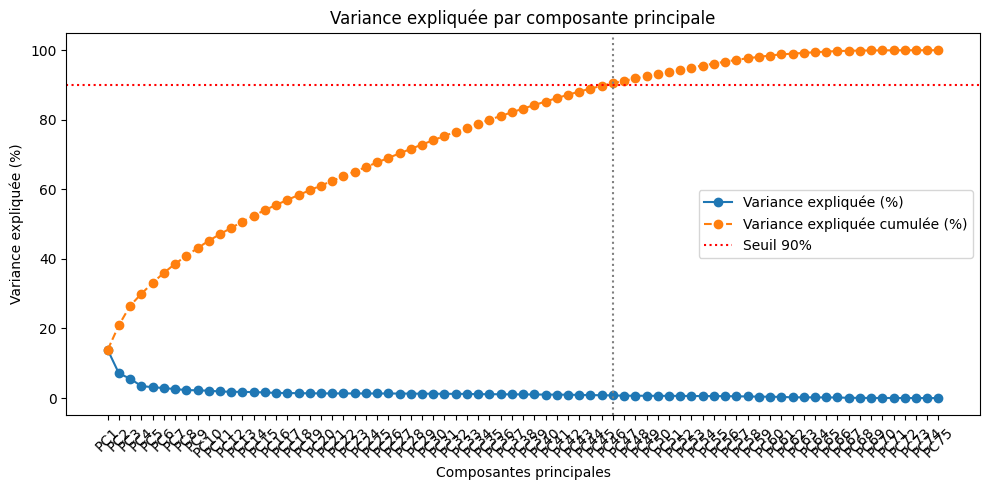

In [92]:
# extraire les variables numériques restantes
X_train_clean_pca = X_train_clean.select_dtypes(include=["number"])
X_train_clean_pca_filled = X_train_clean_pca.copy()
cols_with_nan = X_train_clean_pca.columns[
    X_train_clean_pca.isna().any()
].tolist()
print("Colonnes avec valeurs manquantes :", cols_with_nan)
# remplacement des valeurs manquantes par les modalités les plus risquées
for col, value in risky_modalities.items():
    if col in X_train_clean_pca.columns:
        if X_train_clean_pca[col].isna().any():
            print(f"Remplissage de la colonne {col} avec la valeur {value}.")
            X_train_clean_pca_filled[col] = X_train_clean_pca[col].fillna(
                value
            )
        else:
            print(f"Colonne {col} déjà remplie, aucune action nécessaire.")
    else:
        print(
            f"Colonne {col} non trouvée dans les données, remplissage ignoré."
        )
# PCA
X_scaled = StandardScaler().fit_transform(X_train_clean_pca_filled)
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Labels des composantes principales
pc_labels = [
    f"PC{i}" for i in range(1, len(pca.explained_variance_ratio_) + 1)
]

# Données : pourcentage de variance expliquée
explained_var = pca.explained_variance_ratio_ * 100  # en pourcentage
cumulative_var = np.cumsum(explained_var)

# Déterminer le nombre de composantes pour atteindre 95%
threshold = 90
nb_components = np.argmax(cumulative_var >= threshold) + 1

# Affichage
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer les points pour la variance expliquée
ax.plot(pc_labels, explained_var, "o-", label="Variance expliquée (%)")

# Tracer les points pour la variance cumulée
ax.plot(
    pc_labels, cumulative_var, "o--", label="Variance expliquée cumulée (%)"
)

# Ligne pointillée à 90%
ax.axhline(y=threshold, color="red", linestyle="dotted", label="Seuil 90%")

# Ligne verticale au nombre de composantes nécessaires pour 95%
ax.axvline(x=pc_labels[nb_components - 1], color="gray", linestyle="dotted")

# Titre et étiquettes
ax.set_title("Variance expliquée par composante principale")
ax.set_xlabel("Composantes principales")
ax.set_ylabel("Variance expliquée (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

L'analyse du pourcentage cumulé de variance expliquée montre que 45 composantes principales permettent de capturer au moins 90 % de la variance totale des données. Cela signifie que les variables initiales sont très peu corrélées entre elles. Chacune apporte une part non négligeable d'information.

Cette faible réduction obtenue par ACP provient du fait que les variables sont faiblement dépendantes entre elles d'un point de vue linéaire.
Ainsi, certaines variables ont une distribution très spécifique, rendant l'espace de données très dispersé (même après standardisation).

Essayons toutefois de retirer les *outliers* à l'aide de la méthode `IsolationForest` et affichons les résultats obtenus.

In [93]:
outliers = IsolationForest(contamination=0.01).fit_predict(X_scaled)

In [ ]:
n_outliers = np.sum(outliers == -1)
n_total = len(outliers)
print(
    f"{n_outliers} outliers détectés sur {n_total} observations "
    f"({n_outliers / n_total:.2%})"
)

3837 outliers détectés sur 383610 observations (1.00%)


Cette étape réalisée, il est possible de générer un nouveau jeu de données : `X_filtered` qui sera exploité dans l'ACP.

In [95]:
# Masquer les outliers
mask = outliers != -1
X_filtered = X_train_clean_pca_filled[mask]

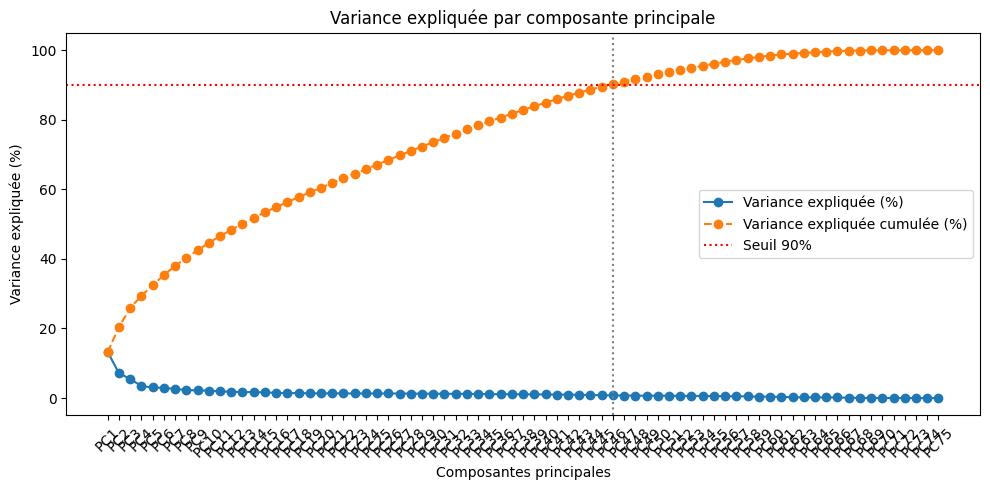

In [96]:
# Re-standardisation
X_scaled_filtered = StandardScaler().fit_transform(X_filtered)

# Nouvelle ACP
pca = PCA()
X_pca_filtered = pca.fit_transform(X_scaled_filtered)

# Labels des composantes principales
pc_labels = [
    f"PC{i}" for i in range(1, len(pca.explained_variance_ratio_) + 1)
]

# Données : pourcentage de variance expliquée
explained_var = pca.explained_variance_ratio_ * 100  # en pourcentage
cumulative_var = np.cumsum(explained_var)

# Déterminer le nombre de composantes pour atteindre 95%
threshold = 90
nb_components = np.argmax(cumulative_var >= threshold) + 1

# Affichage
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer les points pour la variance expliquée
ax.plot(pc_labels, explained_var, "o-", label="Variance expliquée (%)")

# Tracer les points pour la variance cumulée
ax.plot(
    pc_labels, cumulative_var, "o--", label="Variance expliquée cumulée (%)"
)

# Ligne pointillée à 90%
ax.axhline(y=threshold, color="red", linestyle="dotted", label="Seuil 90%")

# Ligne verticale au nombre de composantes nécessaires pour 95%
ax.axvline(x=pc_labels[nb_components - 1], color="gray", linestyle="dotted")

# Titre et étiquettes
ax.set_title("Variance expliquée par composante principale")
ax.set_xlabel("Composantes principales")
ax.set_ylabel("Variance expliquée (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Malgré le retrait des *outliers*, le résultat est le même que pour la première phase d'ACP (sans retrait des *outliers*). L'hypothèse selon laquelle les variables sont faiblement dépendantes entre elles est confirmée.

Bien que l'ACP repose sur des combinaisons linéaires de toutes les variables, il est possible d'identifier les variables d'origine ayant le plus contribué à la variance projetée.

Tout d'abord générons la matrice des charges factorielles (*loadings*).
Pour rappel, l'analyse en composantes principales repose sur la construction de **combinaisons linéaires des variables d’origine** pour former de nouvelles variables orthogonales appelées **composantes principales**.  
Chaque composante est une direction dans l’espace des données qui maximise la variance expliquée.

La contribution de chaque variable d’origine à ces composantes est représentée par la **matrice des charges factorielles**, notée **L** :

$$
\mathbf{L} =
\begin{bmatrix}
\ell_{11} & \ell_{12} & \cdots & \ell_{1k} \\
\ell_{21} & \ell_{22} & \cdots & \ell_{2k} \\
\vdots    & \vdots    & \ddots & \vdots    \\
\ell_{p1} & \ell_{p2} & \cdots & \ell_{pk} \\
\end{bmatrix}
$$

où :
- $ \ell_{ij} $ représente la **charge** (ou poids) de la **variable $ i $** dans la **composante principale $ j $** ;
- $ p $ est le nombre de variables d’origine ;
- $ k $ est le nombre de composantes principales considérées.

- Une valeur $ \ell_{ij} $ élevée (en valeur absolue) indique que la variable $ i $ **contribue fortement** à la construction de la composante $ j $.
- Ces charges permettent d’**évaluer l’importance relative des variables** dans les directions de variance maximales.
- En sommant les valeurs absolues des charges d’une variable sur les premières composantes, on obtient une mesure globale de sa contribution à la variance expliquée.

Lorsque les données sont standardisées, les composantes principales sont des combinaisons linéaires orthonormées, et la **somme des carrés des charges d’une composante vaut 1**.

In [97]:
# Chaque élément l_{i,j} de la matrice loadings représente la contribution
# (ou "poids") de la variable i à la composante principale j.
loadings = pd.DataFrame(
    pca.components_.T,  # transposé : rows = variables, cols = composantes
    columns=pc_labels,  # noms des composantes principales : PC1, PC2, ...
    index=X_train_clean_pca_filled.columns,  # noms des variables d'origine
)

La matrice *loadings* calculée, il est possible d'extraire les variables qui expliquent à elles seules 90 % de la contribution projetée.

In [ ]:
nb_components = np.argmax(cumulative_var >= 90) + 1
# Calcul des contributions cumulées par variable
cumulative_importance = loadings[pc_labels[:nb_components]].abs().sum(axis=1)

# Tri décroissant des variables les plus contributrices
sorted_importance = cumulative_importance.sort_values(ascending=False)
# Normaliser pour obtenir des proportions
relative_importance = sorted_importance / sorted_importance.sum()
cumulative_relative_importance = relative_importance.cumsum()

# Variables qui expliquent à elles seules 90 % de la contribution projetée
top_variables = cumulative_relative_importance[
    cumulative_relative_importance <= 0.90
].index.tolist()
print(
    f"{len(top_variables)} variables sélectionnées pour expliquer ≥90% "
    "de la variance projetée."
)
print(sorted(top_variables))

59 variables sélectionnées pour expliquer ≥90% de la variance projetée.
['ACTIVIT2', 'ANNEE_ASSURANCE', 'CA1', 'CARACT4', 'CARACT5', 'DEROG1', 'DEROG10', 'DEROG11', 'DEROG6', 'DEROG7', 'EQUIPEMENT6', 'IND_Y6_Y7', 'KAPITAL10', 'KAPITAL12', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL3', 'KAPITAL30', 'KAPITAL32', 'KAPITAL38', 'KAPITAL42', 'LOG_A1_A2', 'MEN_FMP', 'NBBAT1', 'NBBAT10', 'NBBAT11', 'NBBAT13', 'NBBAT3', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBSINCONJ', 'NBSINSTRT', 'RISK1', 'RISK2', 'SURFACE1', 'SURFACE10', 'SURFACE12', 'SURFACE13', 'SURFACE14', 'SURFACE17', 'SURFACE21', 'SURFACE4', 'SURFACE5', 'SURFACE7', 'TAILLE3', 'TAILLE4', 'ZONE']


À l'issue de l'analyse en composantes principales, il a été déterminé que 42 variables suffisent à expliquer 90% de la variance totale du jeu de données.
Ces variables présentent les contributions les plus importantes aux composantes principales retenues et peuvent être considérées comme les plus structurantes.

La liste de ces variables est la suivante :
- `ACTIVIT2` ;
- `ANNEE_ASSURANCE` ;
- `CA1` ;
- `CARACT4` ;
- `CARACT5` ;
- `DEROG1` ;
- `DEROG10` ;
- `DEROG11` ;
- `DEROG6` ;
- `DEROG7` ;
- `EQUIPEMENT6` ;
- `IND_Y6_Y7` ;
- `KAPITAL10` ;
- `KAPITAL12` ;
- `KAPITAL14` ;
- `KAPITAL15` ;
- `KAPITAL16` ;
- `KAPITAL17` ;
- `KAPITAL18` ;
- `KAPITAL19` ;
- `KAPITAL20` ;
- `KAPITAL21` ;
- `KAPITAL22` ;
- `KAPITAL23` ;
- `KAPITAL24` ;
- `KAPITAL3` ;
- `KAPITAL30` ;
- `KAPITAL32` ;
- `KAPITAL38` ;
- `KAPITAL42` ;
- `LOG_A1_A2` ;
- `MEN_FMP` ;
- `NBBAT1` ;
- `NBBAT10` ;
- `NBBAT11` ;
- `NBBAT13` ;
- `NBBAT3` ;
- `NBBAT5` ;
- `NBBAT6` ;
- `NBBAT7` ;
- `NBBAT8` ;
- `NBBAT9` ;
- `NBSINCONJ` ;
- `NBSINSTRT` ;
- `RISK1` ;
- `RISK2` ;
- `SURFACE1` ;
- `SURFACE10` ;
- `SURFACE12` ;
- `SURFACE13` ;
- `SURFACE14` ;
- `SURFACE17` ;
- `SURFACE21` ;
- `SURFACE4` ;
- `SURFACE5` ;
- `SURFACE7` ;
- `TAILLE3` ;
- `TAILLE4` ;
- `ZONE` ;

Ainsi, le DataFrame `X_train_clean` doit être mis à jour afin de ne conserver, parmi les variables numériques, que celles identifiées comme les plus contributrices à la variance.
Ce nettoyage ne concerne que les variables numériques et laisse intactes les variables non numériques éventuellement présentes dans le jeu de données.

In [99]:
# Sélection des colonnes non numériques
non_num_cols = X_train_clean.select_dtypes(exclude=["number"]).columns

# Reconstruction du DataFrame avec :
# - colonnes numériques filtrées
# - colonnes non numériques inchangées
X_train_clean = pd.concat(
    [X_train_clean[top_variables], X_train_clean[non_num_cols]], axis=1
)

Dans le cadre d'une première approche supervisée, nous choisissons de transformer la variable `FREQ`, initialement continue et positive, en une variable binaire indiquant la présence ou non d'un sinistre.
Ce choix permet de recourir à des modèles de classification, plus simples à interpréter dans un premier temps, afin de :

- Détecter les variables les plus discriminantes ;
- explorer la structure des facteurs de risque ;
- Poser les bases d'une modélisation ultérieure du coût moyen (CM), conditionnel à l'occurrence d'un sinistre.

## Création d'une variable cible binaire pour la classification

Dans le but de simplifier l'analyse exploratoire supervisée, nous introduisons une nouvelle variable binaire nommée `HAS_CLAIM`, définie comme suit :

- `HAS_CLAIM = 1` si `FREQ > 0` (sinistre déclaré) ;
- `HAS_CLAIM = 0` sinon

Cette transformation permet d'appliquer des modèles de classification afin d'identifier les variables explicatives les plus discriminantes pour la survenue d'un sinistre. Elle servira également de base à une modélisation en deux temps, avec dans un second temps une estimation du coût moyen (`CM`) conditionnel à la présence d'un sinistre.

### Création d'une variable binaire pour indiquer la présence d'un sinistre

Dans un premier temps, créons le *Dataframe* `y_train_extended` qui contiendra la nouvelle variable binaire `HAS_CLAIM`.

In [100]:
# Étape 1 : Création d'une variable binaire pour indiquer la présence d'un
# sinistre

# On copie y_train pour ne pas modifier l'original
y_train_extended = y_train.copy()

# Création de la variable binaire HAS_CLAIM :
# HAS_CLAIM = 1 si FREQ > 0 (sinistre déclaré), 0 sinon
y_train_extended["HAS_CLAIM"] = (y_train_extended["FREQ"] > 0).astype(int)

# Vérification du résultat
print(y_train_extended["HAS_CLAIM"].value_counts())
print(y_train_extended[["FREQ", "HAS_CLAIM"]].head())

HAS_CLAIM
0    380716
1      2894
Name: count, dtype: int64
   FREQ  HAS_CLAIM
0   0.0          0
1   0.0          0
2   0.0          0
3   0.0          0
4   0.0          0


### Analyse exploratoire de la variable `HAS_CLAIM`

Il est important de rappeler que l'analyse exploratoire de la variable `FREQ` a mis en évidence un fort déséquilibre, la grande majorité des observations ne présentant aucun sinistre. Ce déséquilibre se retrouve logiquement dans la variable binaire dérivée `HAS_CLAIM`.


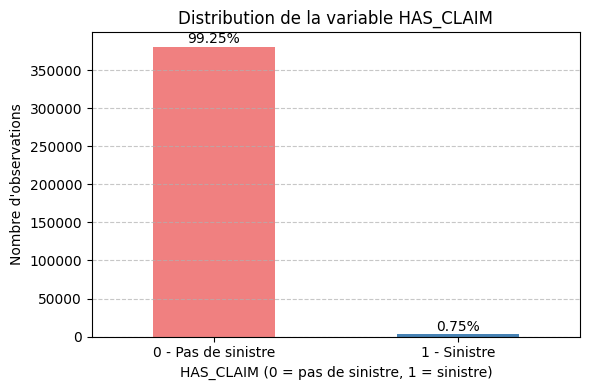

In [101]:
# Fréquence absolue
counts = y_train_extended["HAS_CLAIM"].value_counts().sort_index()

# Fréquence relative (%)
percentages = counts / counts.sum() * 100

# Affichage
plt.figure(figsize=(6, 4))
counts.plot(kind="bar", color=["lightcoral", "steelblue"])

plt.title("Distribution de la variable HAS_CLAIM")
plt.xlabel("HAS_CLAIM (0 = pas de sinistre, 1 = sinistre)")
plt.ylabel("Nombre d'observations")
plt.xticks(
    ticks=[0, 1], labels=["0 - Pas de sinistre", "1 - Sinistre"], rotation=0
)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annoter les barres avec les pourcentages
for i, count in enumerate(counts):
    pct = percentages.iloc[i]
    plt.text(
        i, count + 500, f"{pct:.2f}%", ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.show()

Comme attendu, le déséquilibre de `FREQ` se répercute sur la variable `HAS_CLAIM`.

In [102]:
X_train_merged = X_train_clean.copy()
X_train_merged["FREQ"] = y_train["FREQ"]
X_train_merged.to_csv(".csv", index=False)

In [103]:
# Séparation éventuelle (si tu veux un set de validation)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_clean, y_train["FREQ"], test_size=0.2, random_state=42
)

In [104]:
# Convertir les colonnes object en category
for col in X_train_clean.select_dtypes(include="object").columns:
    X_train_clean[col] = X_train_clean[col].astype("category")

# XGBoost avec enable_categorical
model = XGBRegressor(
    objective="reg:squarederror",
    enable_categorical=True,  # <== important
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
)

model.fit(X_train_clean, y_train["FREQ"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [105]:
importances = model.feature_importances_
features = X_train.columns

# Création d’un DataFrame
importance_df = pd.DataFrame(
    {"variable": features, "importance": importances}
).sort_values(by="importance", ascending=False)

In [106]:
# Calcul des importances
importances = model.feature_importances_
features = X_train.columns

# Création du DataFrame d'importances
importance_df = pd.DataFrame(
    {"variable": features, "importance": importances}
).sort_values(by="importance", ascending=False)

# Appliquer un seuil
seuil = 0.01
important_vars_df = importance_df[importance_df["importance"] > seuil]

print(f"{len(important_vars_df)} variables retenues avec un seuil > {seuil}")

8 variables retenues avec un seuil > 0.01


<Figure size 1000x600 with 0 Axes>

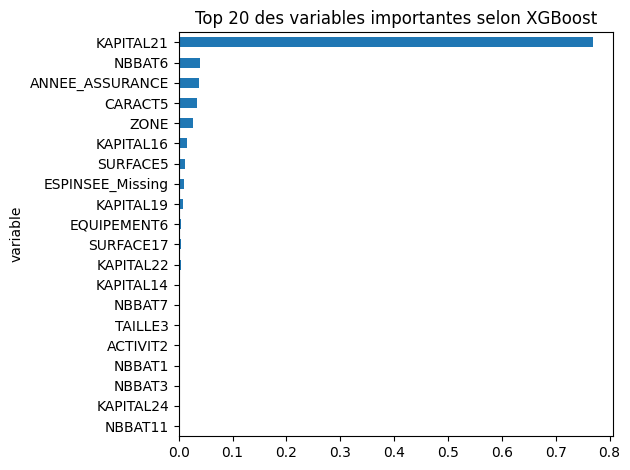

In [107]:
plt.figure(figsize=(10, 6))
importance_df.head(20).plot(
    kind="barh", x="variable", y="importance", legend=False
)
plt.title("Top 20 des variables importantes selon XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Analyse des variables importantes selon XGBoost

La figure ci-dessus présente les **20 variables les plus importantes** dans la prédiction de la variable cible `HAS_CLAIM`, selon un modèle XGBoost.

Les observations principales sont les suivantes :

- `KAPITAL21`
  - Variable de loin la plus influente.
  - Elle semble fortement corrélée à la survenue d'un sinistre. Cela suggère qu'elle pourrait représenter un capital ou une caractéristique fortement discriminante.
  - À vérifier : elle pourrait contenir une information indirectement liée au sinistre (ex. un champ saisi après sinistre, causant un *data leakage*).

- Variables liées aux bâtiments : `NBBAT6`, `NBBAT1`, `NBBAT3`, `NBBAT7`, `NBBAT11`
  - La récurrence de ces variables suggère que le **nombre de bâtiments assurés** est un bon indicateur de risque.
  - L'exposition est proportionnelle au nombre de bâtiments : ce qui est cohérent.

- Variables contextuelles et contractuelles : `ANNEE_ASSURANCE`, `ZONE`, `ACTIVIT2`, `TAILLE3` :
  - Ces variables renseignent sur le profil de l'assuré, la localisation, ou encore la taille de l'activité assurée.
  - Leur présence est cohérente dans un contexte assurantiel.

- `ESPINSEE_Missing`
  - Le fait que la modalité manquante soit importante indique que :
    - soit l'absence d'information est en soi un facteur de risque ;
    - soit cette absence masque des profils de clients à sinistralité élevée.
  - Cela justifie de conserver cette modalité lors du prétraitement.

- Variables liées à la surface : `SURFACE5`, `SURFACE17`
  - Ces variables influencent le modèle, mais de manière modérée.
  - Elles capturent probablement le **volume d'exposition**, sans être aussi discriminantes que les capitaux.

- Autres variables : `CARACT5`, `KAPITAL16`, `KAPITAL14`, `KAPITAL19`, etc.
  - Elles pourraient représenter des caractéristiques contractuelles ou structurelles complémentaires.
  - Leur impact, bien que plus faible, reste non négligeable.

La sélection automatique des variables par *XGBoost* semble globalement cohérente :
- Elle met en évidence des variables structurelles et contractuelles attendues.
- Elle souligne également des éléments à surveiller comme `KAPITAL21` et les valeurs manquantes d'`ESPINSEE`.